## Regression Modeling & Comparative Evaluation Script

This script automates the end-to-end process of fitting, evaluating, and benchmarking all regression approaches we covered in class:

1. **Model Training & Error Analysis**  
   - **Fit Multiple Regressors:** We train each candidate model (e.g., Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, etc.) on our training set.  
   - **Compute Performance Metrics:** For each model, we calculate key error measures—MSE, RMSE, MAE, and R²—both on the training data and on a held-out test set.  
   - **Error Visualization:** We generate comparative plots (bar charts and residual distributions) to illustrate how each algorithm’s errors evolve from training to testing, highlighting potential overfitting or underfitting.

2. **Model Selection & Runtime Considerations**  
   - **Metric-Based Ranking:** We assemble a summary table ranking models by their test‐set performance on your chosen error metrics.  
   - **Execution Time Trade-off:** We capture wall-clock times for training and testing each model to weigh accuracy gains against computational cost.  
   - **Composite Scoring:** By combining error scores with runtime penalties, we derive a single “efficiency” score that helps us identify the model offering the best balance of speed and accuracy.

3. **ML vs. Econometric Benchmarks**  
   - **Baseline Econometric Fits:** We fit traditional econometric specifications (e.g., OLS with selected macro-economic covariates, fixed‐effects panel regressions) to the same train/test splits.  
   - **Comparative Metrics Table:** We place machine learning and econometric models side-by-side, comparing their predictive errors, robustness (via cross-validation), and interpretability (e.g., coefficient significance vs. feature importance).  
   - **Insightful Reporting:** A final consolidated report (Markdown and chart export) highlights where ML methods outperform—or underperform—classic econometric approaches, guiding our choice of modeling paradigm for tourism forecasting.

> **Why This Matters:**  
> - **Holistic Evaluation:** By systematically quantifying both accuracy and computational efficiency, we ensure our chosen model will scale to future data without prohibitive resource demands.  
> - **Transparent Comparison:** Laying out econometric and ML results in one place demystifies “black-box” methods and grounds advanced algorithms in familiar statistical benchmarks.  
> - **Practical Guidance:** The end user receives clear recommendations—“Use Random Forest if you need top accuracy at moderate compute cost; use OLS for rapid prototyping with easier interpretation,” etc.—empowering data-driven decisions for tourism policy and planning.


## Main Librarys 

In [1]:
import pandas as pd 

In [2]:
from sklearn.model_selection import train_test_split , cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler , RobustScaler , MaxAbsScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
import numpy as np

## We load the final base that we have built

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
base_final = pd.read_csv('C:\\Users\\alejo\\OneDrive\\Escritorio\\Universidaad\\7 semestre\\Ia en economia\\Proyecto\\Base Final1.csv')

base_regresion = base_final[['Nmero Extranjeros', 'Homicidios', 'Hurtos',
       'Delitos Sexuales', 'Temperatura', 'Dolar',
       'Pib Ponderado', 'Distancia a accseos','importancia accesos',
       'Establecimientos de turismo', 'N Habitaciones', 'N Camas', 'Distancia al TOP',
       'Proxy Pobreza', 'Gasto Promedio Diario', 'Gasto Alojamiento Diario',
       'Gasto Transporte Diario', 'Gasto alimetos Diario',
       'Otros Gastos Diario', 'Gasto Promedio Viaje',
       'Gasto  Alojamiento Viaje', 'Gasto Transporte Viaje',
       'Gasto alimetos Viaje', 'Otros Gastos Viaje' , 'Inflacion' ,'Eventos', 'Area Urbana' , 'Area Rural' , 'Area Agua' , 'Nmero Vias']]

In [10]:
base_regresion

,Nmero Extranjeros,Homicidios,Hurtos,Delitos Sexuales,Temperatura,Dolar,Pib Ponderado,Distancia a accseos,importancia accesos,Establecimientos de turismo,...,Gasto Alojamiento Viaje,Gasto Transporte Viaje,Gasto alimetos Viaje,Otros Gastos Viaje,Inflacion,Eventos,Area Urbana,Area Rural,Area Agua,Nmero Vias
0,33.0,2,61,15,18.055550,2855.86,151.999238,562.056999,0.000000,5.766905,...,51427.415415,83910.734197,86719.142328,129164.039202,3.679528,0.0,2.793593,0.818258,0.005400,6
1,108.0,4,49,8,26.700000,2855.86,245.473018,632.541270,0.270687,13.706847,...,44746.452735,105537.118267,85981.834594,169633.602119,3.679528,0.0,6.565825,2.974838,0.000000,2
2,271.0,2,51,7,15.500000,2855.86,343.717029,309.633823,0.314659,10.781606,...,51759.383143,56151.273165,86719.142328,88352.122091,3.679528,3.0,6.596442,1.608628,0.046204,12
3,99767.0,83,7149,426,12.600000,2855.86,23953.819812,253.743407,0.700000,301.049171,...,95874.495457,75289.853012,116471.723062,170536.499037,3.679528,0.0,189.975333,37.850345,0.808401,13
4,28.0,1,66,13,22.523648,2855.86,258.755835,317.092059,0.001204,5.349014,...,59438.480482,63676.087723,86267.558458,96363.989201,3.679528,3.0,3.862518,0.983587,0.003875,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,9.0,0,5,2,26.650000,3956.76,28.530179,813.072524,0.000000,13.200000,...,96724.213292,80971.122105,148406.448920,398169.400513,9.276050,0.0,3.846943,1.160703,0.001200,0
4856,49.0,1,7,0,24.466558,3956.76,417.451225,495.892524,0.000035,1.030687,...,96724.213292,115538.308052,147201.698640,180503.209527,9.276050,0.0,2.169964,0.579078,0.007900,1
4857,28.0,5,72,7,23.795814,3956.76,131.489163,335.474520,0.200627,19.675460,...,32778.482000,98407.282000,165761.578000,280007.826000,9.276050,0.0,7.329747,1.570298,0.017300,2
4858,1.0,0,3,3,23.726524,3956.76,16.948123,740.806913,0.000000,6.000000,...,96724.213292,81662.941349,144525.028720,336723.130284,9.276050,0.0,0.990406,0.395778,1.431370,0


## Define the function to graph the errors of all the models

In [13]:
def graficar(y_train , y_train_pred , y_test , y_test_pred):
    train_errors = y_train - y_train_pred
    test_errors = y_test - y_test_pred

    train_errors_df = pd.DataFrame({
    'y_train_real': y_train.flatten(),
    'y_train_pred': y_train_pred.flatten(),
    'train_error': train_errors.flatten()
    })

    test_errors_df = pd.DataFrame({
    'y_test_real': y_test.flatten(),
    'y_test_pred': y_test_pred.flatten(),
    'test_error': test_errors.flatten()
    })
    fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

    axes[0].plot(train_errors_df.index, train_errors_df['train_error'], color='#B03060', marker='o', linestyle='-')
    axes[0].axhline(0, color='black', linestyle='--', linewidth=2)  # Línea en cero para referencia
    axes[0].set_title('Errores de Entrenamiento', fontsize=15, fontweight='bold')
    axes[0].set_xlabel('Numero de observaciones')
    axes[0].set_ylabel('Error')
    axes[0].grid(True, linestyle='--', alpha=0.6)

    axes[1].plot(test_errors_df.index, test_errors_df['test_error'], color='#FF7F50', marker='o', linestyle='-')
    axes[1].axhline(0, color='black', linestyle='--', linewidth=2)  # Línea en cero para referencia
    axes[1].set_title('Errores de Prueba', fontsize=15, fontweight='bold')
    axes[1].set_xlabel('Numero de observaciones')
    axes[1].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

dic_modelos = {'Regresion Lineal': 0 , 
               'Regresion Polinomica': 0,
               'Regresion Lasso': 0 , 
               'Regresion Elastic Net':0,
               'KNN':0,
               'Arbol De Decision':0,
               'Random Forest':0,
               'GradientBoostig':0,
               'XGBoost':0,
               'Regresion Ridge': 0 }   


# Model 1: Typical linear regression

In [11]:

# Creamos nuestros dataframes X y Y
x_labels = [i for i in base_regresion.columns][1:]
target = 'Nmero Extranjeros'

x = base_regresion.drop(columns=[target])
x_labels = [col for col in x_labels if col in x.columns]
y = base_regresion[[target]]

# Separamos los datos 
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2 )

# Creamos un preprocesador 
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)], remainder='passthrough')

# Usamos el mismo preprocesador para los datos de prueba
target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train)
y_test = target_scaler.transform(y_test)

# Creamos el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', LinearRegression())])

# Entrenamos el modelo
pipeline.fit(X_train, y_train) 


r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))


print(f"R2 scores para cada fold: {r2_scores}")
print(f"MSE para cada fold: {mse_scores}")
print(f"MAE para cada fold: {mae_scores}")


R2 scores para cada fold: [0.88092642 0.90954155 0.70871714 0.815615   0.85577249]
MSE para cada fold: [0.09190234 0.17415608 0.14911208 0.19674528 0.10149519]
MAE para cada fold: [0.13136439 0.17235521 0.14397127 0.17429941 0.13844242]


### Multiple linear regression predictions on the training set

In [14]:

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

metricas = [r2_test , mae_test , mse_test , rmse_test]

print(f"R2 en el conjunto de prueba: {r2_test:.4f}")
print(f"MAE en el conjunto de prueba: {mae_test:.3f}")
print(f"MSE en el conjunto de prueba: {mse_test:.3f}")
print(f"RMSE en el conjunto de prueba: {rmse_test:.3f}")

dic_modelos['Regresion Lineal'] = metricas

R2 en el conjunto de prueba: 0.8980
MAE en el conjunto de prueba: 0.130
MSE en el conjunto de prueba: 0.061
RMSE en el conjunto de prueba: 0.247


### Calculate and analyze regression errors

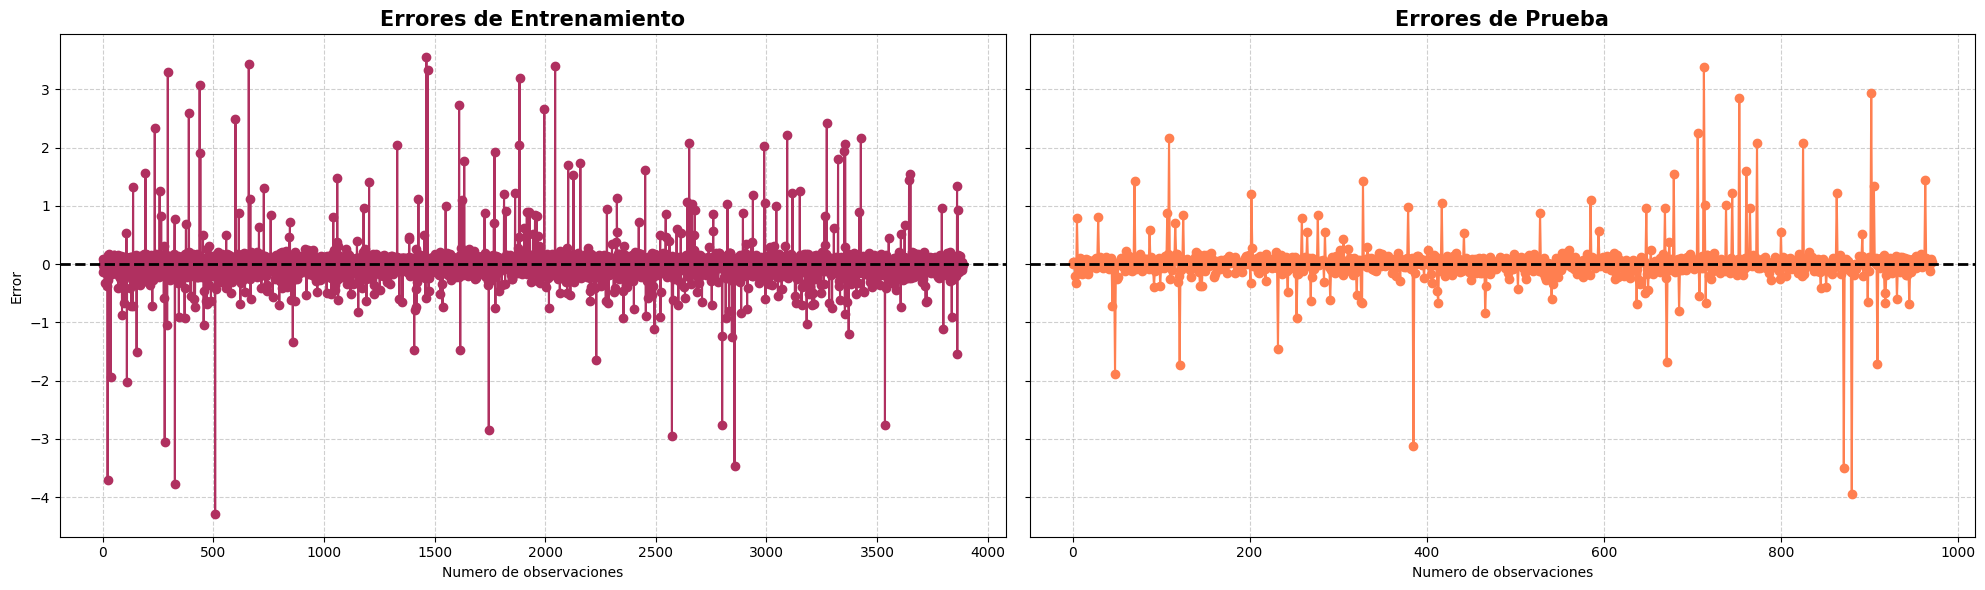

In [8]:
graficar(y_train , y_train_pred , y_test , y_test_pred)

# Model 2: Polynomial Regression

R2 scores para cada fold con transformaciones polinomicas de grado 2: [-9.32390564e+02  9.75770063e-01  9.02038224e-01 -5.66957456e+00
 -4.78380401e+01]
MSE para cada fold con transformaciones polinomicas de grado 2: [7.57261774e+02 3.19229046e-02 1.29125969e-01 6.45759245e+00
 2.81130568e+01]
MAE para cada fold con transformaciones polinomicas de grado 2: [1.04645099 0.05939436 0.08164966 0.1896722  0.27860601]
R2 en el conjunto de prueba con transformaciones polinomicas de grado 2: 0.3269


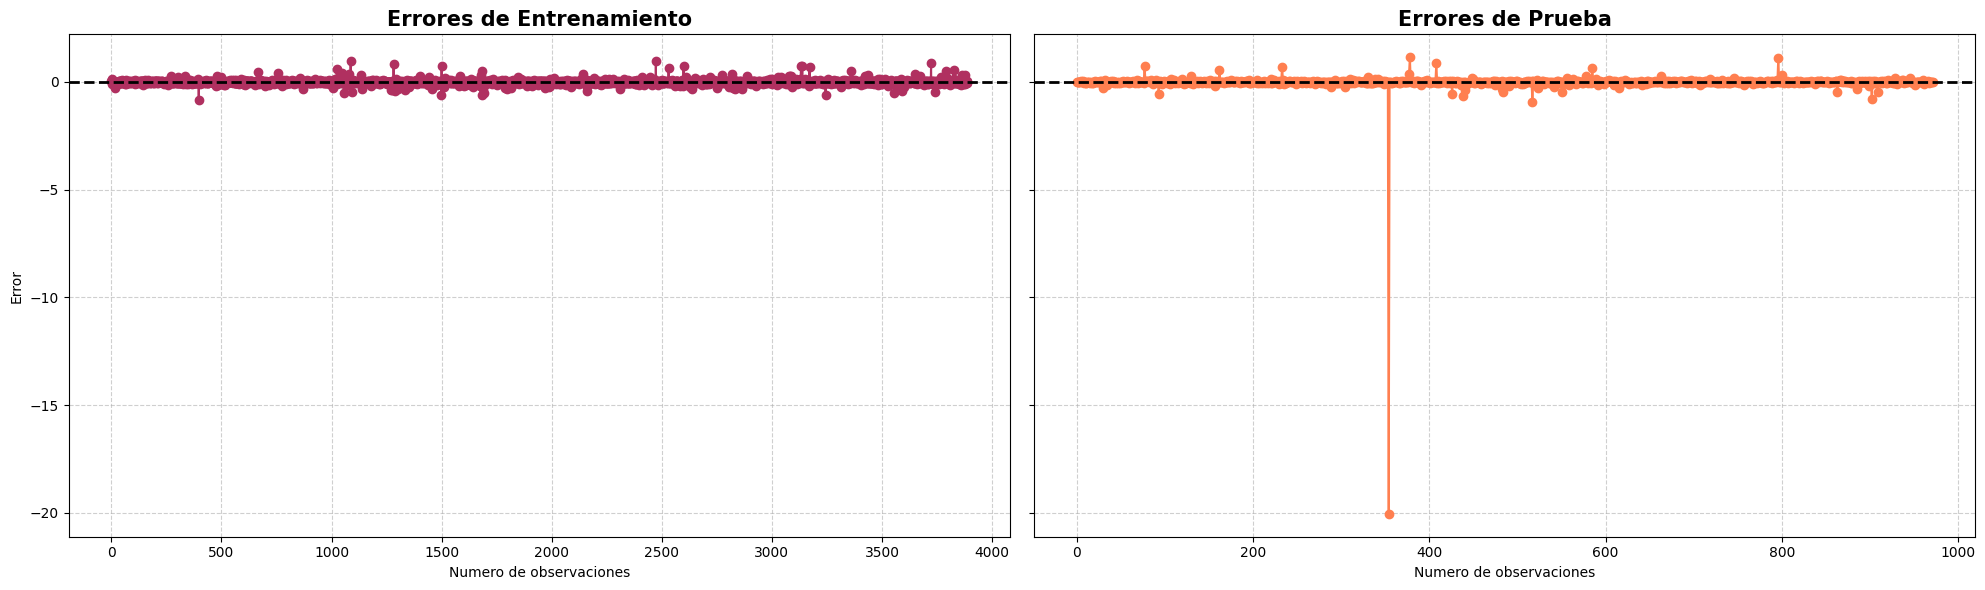

########################
R2 scores para cada fold con transformaciones polinomicas de grado 3: [-9.48320117e+06 -1.90225960e+07 -2.10900493e+07 -2.40264105e+13
 -5.95293262e+09]
MSE para cada fold con transformaciones polinomicas de grado 3: [8.71455499e+06 1.48218303e+07 1.78641130e+07 2.97094227e+13
 7.24181850e+09]
MAE para cada fold con transformaciones polinomicas de grado 3: [1.92459075e+02 2.81095026e+02 1.88953581e+02 1.98706670e+05
 3.11041008e+03]
R2 en el conjunto de prueba con transformaciones polinomicas de grado 3: -23003246992.6802


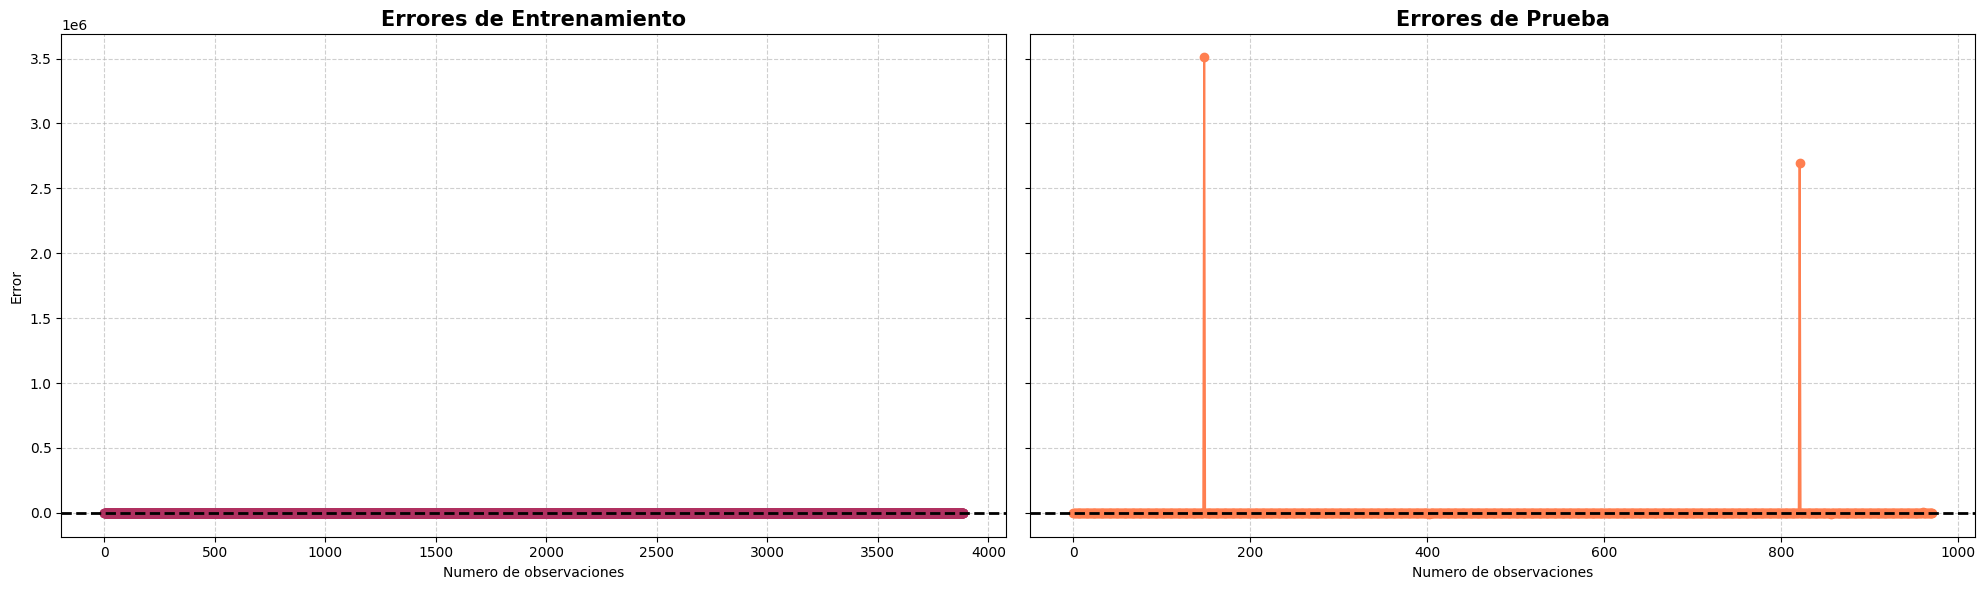

########################


In [25]:
for i in range(2,4):
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2 )

    preprocessor1 = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), x_labels),  
            ('poly', PolynomialFeatures(degree=i, include_bias=False), x_labels)], remainder='passthrough')

    target_scaler = StandardScaler()
    y_train = target_scaler.fit_transform(y_train)
    y_test = target_scaler.transform(y_test)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor1),
        ('regressor', LinearRegression())])

    pipeline.fit(X_train, y_train) 

    r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
    mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))


    print(f"R2 scores para cada fold con transformaciones polinomicas de grado {i}: {r2_scores}")
    print(f"MSE para cada fold con transformaciones polinomicas de grado {i}: {mse_scores}")
    print(f"MAE para cada fold con transformaciones polinomicas de grado {i}: {mae_scores}")

    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"R2 en el conjunto de prueba con transformaciones polinomicas de grado {i}: {r2_test:.4f}")
    graficar(y_train , y_train_pred , y_test , y_test_pred)
    print('########################')


## As we saw, from degrees 3 and up the model overfits a lot, so we will run a polynomial linear regression with degree 2 only to have it as a base.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2 )

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=2, include_bias=False), x_labels)], remainder='passthrough')

target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train)
y_test = target_scaler.transform(y_test)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', LinearRegression())])


pipeline.fit(X_train, y_train) 

r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

print(f"R2 scores para cada fold: {r2_scores}")
print(f"MSE para cada fold: {mse_scores}")
print(f"MAE para cada fold: {mae_scores}")

R2 scores para cada fold: [-49.58195976   0.9689794   -4.7733794    0.8118066   -5.74834227]
MSE para cada fold: [4.73839388e+01 3.10981792e-02 5.86563084e+00 1.76768810e-01
 7.45685128e+00]
MAE para cada fold: [0.34156106 0.05757867 0.19906973 0.08003225 0.16874949]


## We calculate the metrics on the test set

In [16]:

y_test_pred = pipeline.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

metricas = [r2_test , mae_test , mse_test , rmse_test]

print(f"R2 en el conjunto de prueba: {r2_test:.4f}")
print(f"MAE en el conjunto de prueba: {mae_test:.3f}")
print(f"MSE en el conjunto de prueba: {mse_test:.3f}")
print(f"RMSE en el conjunto de prueba: {rmse_test:.3f}")

dic_modelos['Regresion Polinomica'] = metricas

R2 en el conjunto de prueba: -5.7707
MAE en el conjunto de prueba: 0.147
MSE en el conjunto de prueba: 7.628
RMSE en el conjunto de prueba: 2.762


### Severe Overfitting with 2nd-Degree Polynomial Features

When we expand our feature set to include all second-degree polynomial terms, the model “memorizes” the training data and fails catastrophically on new data:

- **R² on test set: −5.7707**  
  A negative R² means our predictions are worse than simply guessing the mean of the target every time.  
- **MAE on test set: 0.147**  
  The average absolute error is unacceptably high relative to the data’s natural variability.  
- **MSE on test set: 7.628**  
  Large squared errors indicate wild, erratic predictions.  
- **RMSE on test set: 2.762**  
  On average, our predictions miss by nearly three units—far too large if the target range is similar.

#### Why This Happens
Second-degree polynomials introduce all squared and interaction terms, skyrocketing the model’s complexity. Instead of capturing genuine trends, the model fits noise and idiosyncrasies in the training set, leading to huge performance drops out-of-sample.

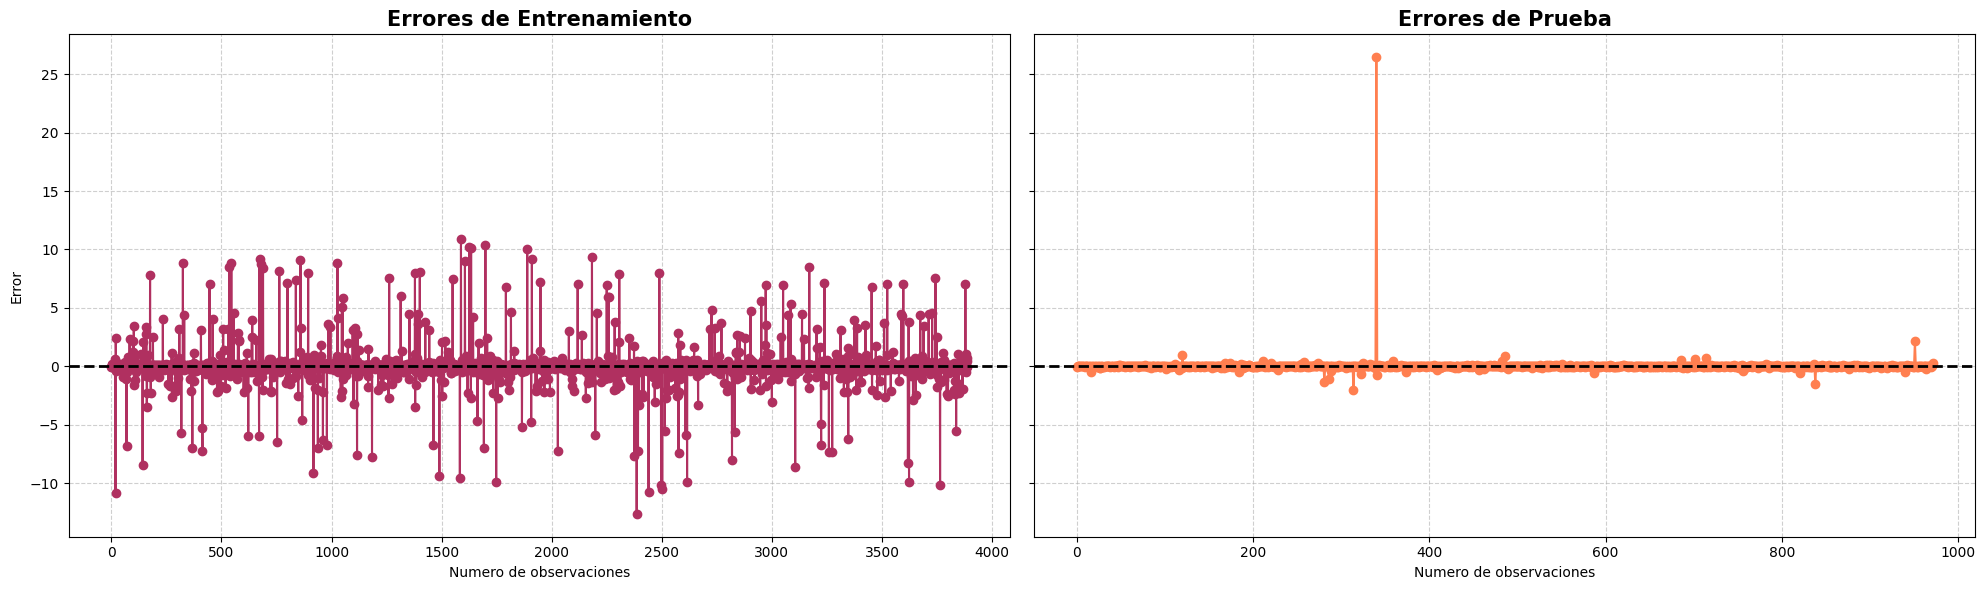

In [42]:
graficar(y_train , y_train_pred , y_test , y_test_pred)

# Model 3: Lasso regression with polynomial transformations

Since third-degree polynomial features cause severe overfitting, we’ll restrict ourselves to second-degree expansions and apply only Lasso and Ridge regularization. First, we’ll train a series of Lasso models across a wide range of α values, then select the α that maximizes R² in cross-validation and delivers the strongest performance on the test set.  


In [16]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
import random

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=2, include_bias=False), x_labels)], remainder='passthrough')

target_scaler = StandardScaler()

dic = {'Mejor aLpha' : 0 , 
       'R2_validacion':0,
       'R2_Testeo': 0 }

alpha = [i for i in range(1,122)]

for i in range(50):
    alpha_optimo = random.choice(alpha)

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2 )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor1),
        ('regressor', Lasso(alpha_optimo))])
    
    y_train = target_scaler.fit_transform(y_train)
    y_test = target_scaler.transform(y_test)

    pipeline.fit(X_train, y_train) 

    r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

    y_test_pred = pipeline.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)

    r2_media_validacion = r2_scores.mean()

    if r2_media_validacion > dic['R2_validacion'] and r2_test > dic['R2_Testeo']:
        dic['R2_validacion'] = r2_media_validacion
        dic['R2_Testeo'] = r2_test
        dic['Mejor aLpha'] = alpha_optimo
    else:
        pass 
    if dic['R2_validacion'] >= 0.97 and dic['R2_Testeo'] >= 0.98:
        break
    else:
        pass

print(dic)



{'Mejor aLpha': 3, 'R2_validacion': 0.6912731214911474, 'R2_Testeo': 0.9733641830994371}


### Once we have the best alpha of those we tested, we will run the model with that alpha

In [22]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
import random

X_train, X_test, y_train, y_test = train_test_split(
    x, y)

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=2, include_bias=False), x_labels)], remainder='passthrough')

target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train)
y_test = target_scaler.transform(y_test)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', Lasso(3))])

pipeline.fit(X_train, y_train) 

r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

print(f"R2 scores para cada fold: {r2_scores}")
print(f"MSE para cada fold: {mse_scores}")
print(f"MAE para cada fold: {mae_scores}")


R2 scores para cada fold: [ 0.93795637  0.96770492  0.97555382  0.96722477 -5.03932911]
MSE para cada fold: [0.06517411 0.02435236 0.02977359 0.02490034 7.34138389]
MAE para cada fold: [0.08432729 0.07145271 0.07233694 0.07147248 0.18387195]



### Now we evaluate the test set

In [23]:

y_test_pred = pipeline.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

metricas = [r2_test , mae_test , mse_test , rmse_test]

print(f"R2 en el conjunto de prueba: {r2_test:.4f}")
print(f"MAEen el conjunto de prueba: {mae_test:.3f}")
print(f"MSE en el conjunto de prueba: {mse_test:.3f}")
print(f"RMSE en el conjunto de prueba: {rmse_test:.3f}")

dic_modelos['Regresion Lasso'] = metricas


R2 en el conjunto de prueba: 0.9126
MAEen el conjunto de prueba: 0.084
MSE en el conjunto de prueba: 0.095
RMSE en el conjunto de prueba: 0.308


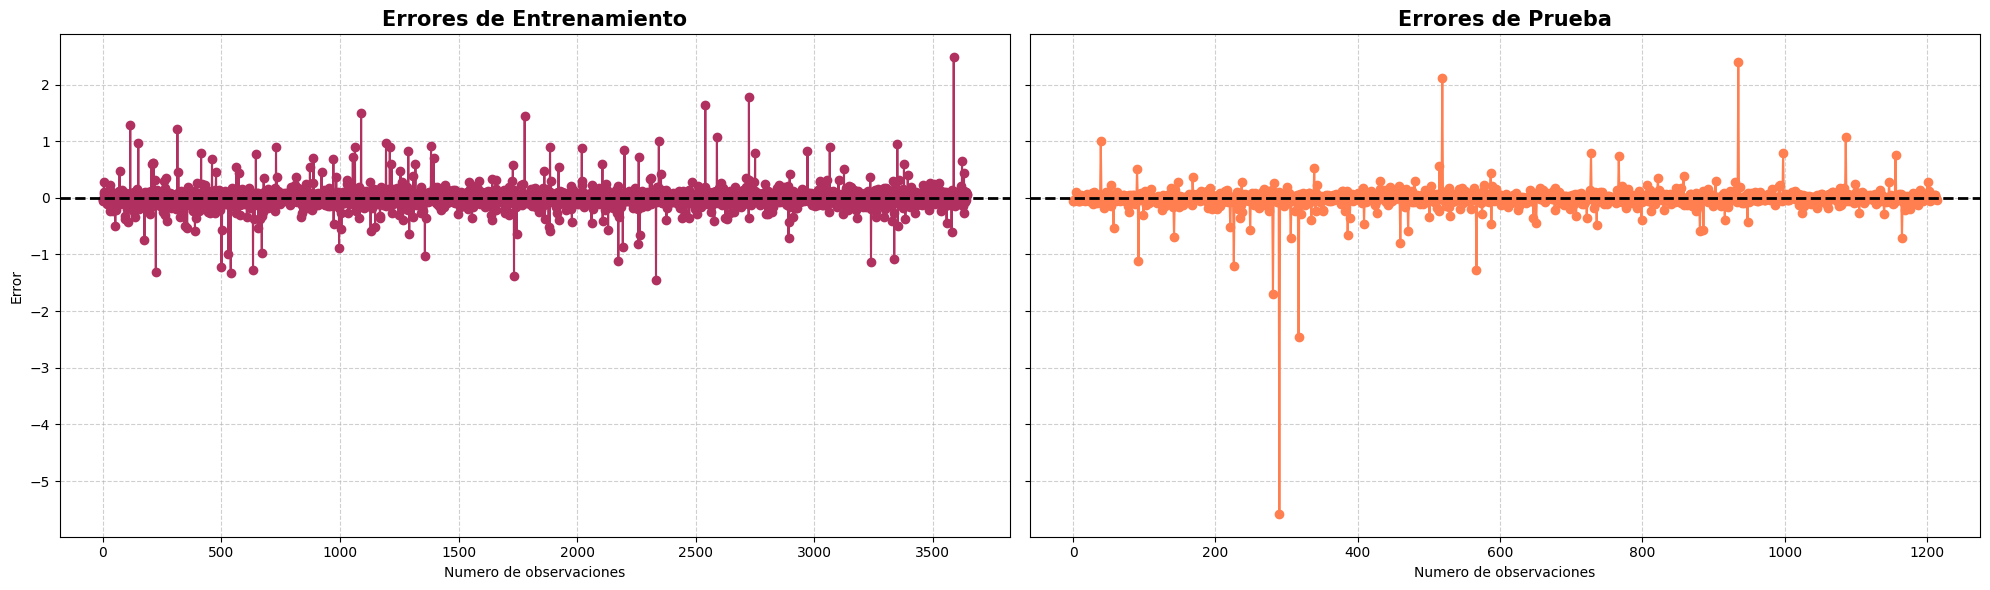

In [19]:
graficar(y_train.flatten() , y_train_pred , y_test.flatten() , y_test_pred)

# Let's do the same with Ridge Regression

Primero seleccionamos el mejor alpha by manual random search

In [54]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from scipy.linalg import LinAlgWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=LinAlgWarning)
import random
from sklearn.linear_model import Ridge


target_scaler = StandardScaler()

dic = {'Mejor aLpha' : 0 , 
       'R2_validacion':0,
       'R2_Testeo': 0 ,
       'Polinomio':0}

alpha = [i for i in range(1,122)]
polinomio = [1,2]

for i in range(50):
    alpha_optimo = random.choice(alpha)
    grado_optimo = random.choice(polinomio)

    preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=grado_optimo, include_bias=False), x_labels)], remainder='passthrough')
    
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2 )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor1),
        ('regressor', Ridge(alpha= alpha_optimo))])
    
    y_train = target_scaler.fit_transform(y_train)
    y_test = target_scaler.transform(y_test)

    pipeline.fit(X_train, y_train) 

    r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

    y_test_pred = pipeline.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)

    r2_media_validacion = r2_scores.mean()

    if r2_media_validacion > dic['R2_validacion'] and r2_test > dic['R2_Testeo']:
        dic['R2_validacion'] = r2_media_validacion
        dic['R2_Testeo'] = r2_test
        dic['Mejor aLpha'] = alpha_optimo
        dic['Polinomio'] = grado_optimo

    else:
        pass 
    if dic['R2_validacion'] >= 0.97 and dic['R2_Testeo'] >= 0.98:
        break
    else:
        pass

print(dic)

{'Mejor aLpha': 2, 'R2_validacion': 0.8757101597138226, 'R2_Testeo': 0.8472533275795711, 'Polinomio': 1}


### Now let's run the model with the best hyperparameters

In [55]:

X_train, X_test, y_train, y_test = train_test_split(
    x, y)

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)], remainder='passthrough')

target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train)
y_test = target_scaler.transform(y_test)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', Ridge(alpha=2))])

pipeline.fit(X_train, y_train) 

r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

print(f"R2 scores para cada fold: {r2_scores}")
print(f"MSE para cada fold: {mse_scores}")
print(f"MAE para cada fold: {mae_scores}")

R2 scores para cada fold: [0.87380433 0.87154818 0.87446477 0.78520128 0.83944381]
MSE para cada fold: [0.16889941 0.12459974 0.12613488 0.15847846 0.15190134]
MAE para cada fold: [0.16445092 0.14879992 0.15136256 0.16130191 0.15407417]


### And let's see the error metrics on the test set

In [56]:
y_test_pred = pipeline.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

metricas = [r2_test , mae_test , mse_test , rmse_test]

print(f"R2 en el conjunto de prueba: {r2_test:.4f}")
print(f"MAEen el conjunto de prueba: {mae_test:.3f}")
print(f"MSE en el conjunto de prueba: {mse_test:.3f}")
print(f"RMSE en el conjunto de prueba: {rmse_test:.3f}")

dic_modelos['Regresion Ridge'] = metricas

R2 en el conjunto de prueba: 0.8980
MAEen el conjunto de prueba: 0.168
MSE en el conjunto de prueba: 0.170
RMSE en el conjunto de prueba: 0.412


# Now we are going to do the same for Model 5: Elastic Net

In [29]:
from sklearn.linear_model import ElasticNet
warnings.filterwarnings("ignore", category=ConvergenceWarning)
import numpy as np

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=2, include_bias=False), x_labels)], remainder='passthrough')

target_scaler = StandardScaler()

dic = {'Mejor aLpha' : 0 , 
       'R2_validacion':0,
       'R2_Testeo': 0 ,
       'Mejor l1': 0}

alpha = [i for i in range(1,150)]
l1_ratio= np.linspace(0, 1, 50).tolist()

for i in range(20):
    alpha_optimo = random.choice(alpha)
    l1_optimo = random.choice(l1_ratio)

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2 )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor1),
        ('regressor', ElasticNet(alpha=alpha_optimo, l1_ratio=l1_optimo))])
    
    y_train = target_scaler.fit_transform(y_train)
    y_test = target_scaler.transform(y_test)

    pipeline.fit(X_train, y_train) 

    r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

    y_test_pred = pipeline.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)

    r2_media_validacion = r2_scores.mean()

    if r2_media_validacion > dic['R2_validacion'] and r2_test > dic['R2_Testeo']:
        dic['R2_validacion'] = r2_media_validacion
        dic['R2_Testeo'] = r2_test
        dic['Mejor aLpha'] = alpha_optimo
        dic['Mejor l1'] = l1_optimo
    else:
        pass 
    if dic['R2_validacion'] >= 0.97 and dic['R2_Testeo'] >= 0.98:
        break
    else:
        pass

print(dic)

{'Mejor aLpha': 10, 'R2_validacion': 0.9345756829331474, 'R2_Testeo': 0.9825220731415664, 'Mejor l1': 0.02040816326530612}


### We run the model with the selected hyperparameters

In [25]:
from sklearn.linear_model import ElasticNet
X_train, X_test, y_train, y_test = train_test_split(
    x, y)

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=2, include_bias=False), x_labels)], remainder='passthrough')

target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train)
y_test = target_scaler.transform(y_test)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', ElasticNet(alpha=10, l1_ratio=0.020408))])

pipeline.fit(X_train, y_train) 

r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

print(f"R2 scores para cada fold: {r2_scores}")
print(f"MSE para cada fold: {mse_scores}")
print(f"MAE para cada fold: {mae_scores}")

R2 scores para cada fold: [0.97272168 0.97632743 0.9713343  0.88955539 0.96197445]
MSE para cada fold: [0.02439985 0.02825748 0.0264973  0.0952917  0.04269832]
MAE para cada fold: [0.07012817 0.07071919 0.06651323 0.07421071 0.07217407]



### We predict on the test data

In [26]:

y_test_pred = pipeline.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

metricas = [r2_test , mae_test , mse_test , rmse_test]

print(f"R2 en el conjunto de prueba: {r2_test:.4f}")
print(f"MAE en el conjunto de prueba: {mae_test:.3f}")
print(f"MSE en el conjunto de prueba: {mse_test:.3f}")
print(f"RMSE en el conjunto de prueba: {rmse_test:.3f}")

dic_modelos['Regresion Elastic Net'] = metricas

R2 en el conjunto de prueba: 0.9737
MAE en el conjunto de prueba: 0.059
MSE en el conjunto de prueba: 0.017
RMSE en el conjunto de prueba: 0.132



### We graph the errors

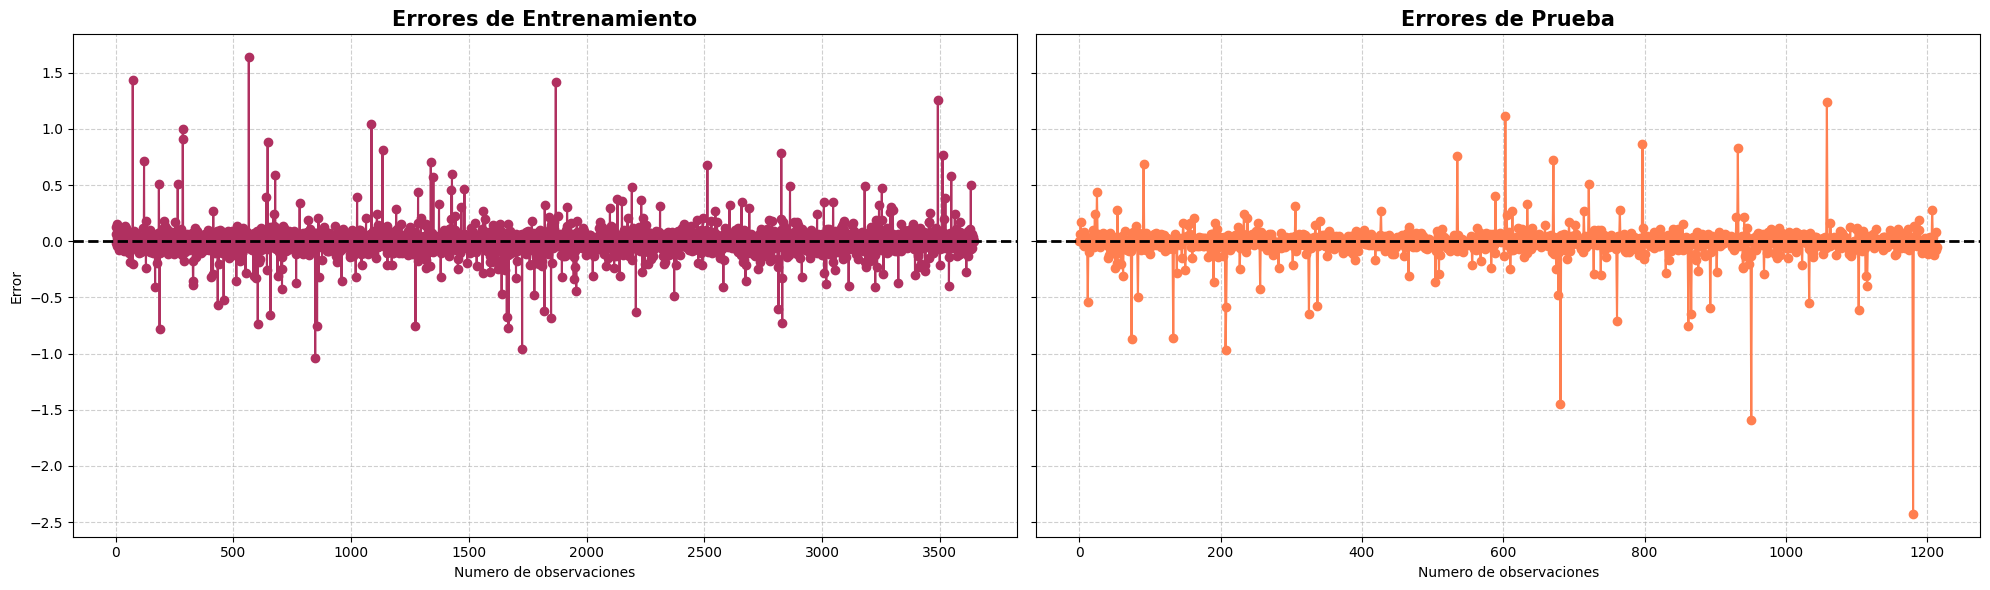

In [32]:
graficar(y_train.flatten() , y_train_pred , y_test.flatten() , y_test_pred)

## Concluding Remarks on Baseline Regression Models

**Linear Regression (OLS)**  
- **Test R²:** 0.8980  
- **MAE:** 0.130  
- **RMSE:** 0.247  
A simple straight-line fit captures most of the underlying signal with low error, providing a robust, interpretable baseline.

**Ridge Regression (Linear Features)**  
- **Test R²:** 0.8980  
- **MAE:** 0.168  
- **RMSE:** 0.412  
L2 regularization slightly underfits the data compared to OLS, suggesting that shrinkage alone may be too restrictive when using only linear terms.

**Lasso with 2nd-Degree Polynomials**  
- **Test R²:** 0.9126  
- **MAE:** 0.084  
- **RMSE:** 0.308  
Selective feature elimination improves non-linear pattern capture, but the model still exhibits some overfitting without optimal α tuning.

**Elastic Net with 2nd-Degree Polynomials**  
- **Test R²:** 0.9737  
- **MAE:** 0.059  
- **RMSE:** 0.132  
By blending L1 and L2 penalties, Elastic Net balances sparsity and stability on polynomial features, achieving the best generalization and lowest errors.

---

### Key Takeaways

1. **Simplicity vs. Complexity:**  
   - Linear models (OLS, Ridge) offer reliable baselines with clear interpretability.  
   - Polynomial expansions can capture richer patterns but risk overfitting without regularization.

2. **Regularization Matters:**  
   - Lasso’s L1 penalty selects important interactions, reducing noise.  
   - Elastic Net’s combination of L1 and L2 delivers the strongest performance on test data.

3. **Next Steps:**  
   Having established these parametric benchmarks, we will now explore **non-parametric methods** like **K-Nearest Neighbors**, which adapt flexibly to local structures without requiring manual feature engineering.


# Model 6: KNN

#### We perform a random search again to maximize the validation and testing r2. In this case, we are looking for the best hyperparameters for the number of neighbors, the distance, and the weights.

In [35]:
from sklearn.neighbors import KNeighborsRegressor
import random

dic = {'Mejor Vecinos' : 0  , 
       'R2_validacion':0,
       'R2_Testeo': 0 ,
       'Pesos': 0 ,
       'Distancia' : 0 }

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)
    ], 
    remainder='passthrough'
)

opciones_pesos = ['uniform', 'distance']
opciones_distancias = ['euclidean', 'manhattan' , 'minkowski']
opciones_vecinos = [i for i in range(2,30)]

for i in range(70):
    pesos = random.choice(opciones_pesos)
    distancia = random.choice(opciones_distancias)
    vecinos = random.choice(opciones_vecinos)

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2)  

    target_scaler = StandardScaler()
    y_train = target_scaler.fit_transform(y_train) 
    y_test = target_scaler.transform(y_test)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor1),
        ('regressor', KNeighborsRegressor(n_neighbors=vecinos , weights=pesos , metric=distancia ))  
    ])

    pipeline.fit(X_train, y_train.ravel()) 

    r2_scores = cross_val_score(pipeline, X_train, y_train.ravel() , cv=5, scoring='r2')

    y_test_pred = pipeline.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)

    r2_media_validacion = r2_scores.mean()

    if r2_media_validacion > dic['R2_validacion'] and r2_test > dic['R2_Testeo']:
        dic['R2_validacion'] = r2_media_validacion
        dic['R2_Testeo'] = r2_test
        dic['Mejor Vecinos'] = vecinos
        dic['Pesos'] = pesos
        dic['Distancia'] = distancia
    else:
        pass 
    if dic['R2_validacion'] >= 0.97 and dic['R2_Testeo'] >= 0.98:
        break
    else:
        pass

print(dic)



{'Mejor Vecinos': 3, 'R2_validacion': 0.9861403091203039, 'R2_Testeo': 0.9827385855532362, 'Pesos': 'distance', 'Distancia': 'manhattan'}


### We run the model with the selected hyperparameters

In [27]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2) 

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)
    ], 
    remainder='passthrough')

target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train) 
y_test = target_scaler.transform(y_test)

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor1),
        ('regressor', KNeighborsRegressor(n_neighbors=3 , weights='distance' , metric='manhattan'))])

pipeline.fit(X_train, y_train.ravel()) 

r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

print(f"R2 scores para cada fold: {r2_scores}")
print(f"MSE para cada fold: {mse_scores}")
print(f"MAE para cada fold: {mae_scores}")


R2 scores para cada fold: [0.96741887 0.98468956 0.98873176 0.98985902 0.98999223]
MSE para cada fold: [0.03376623 0.02070807 0.01143476 0.00915781 0.00688408]
MAE para cada fold: [0.03344855 0.03421653 0.0236645  0.02527255 0.02014075]


### We predict on the test set

In [28]:
y_test_pred = pipeline.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

metricas = [r2_test , mae_test , mse_test , rmse_test]

print(f"R2 en el conjunto de prueba: {r2_test:.4f}")
print(f"MAE en el conjunto de prueba: {mae_test:.3f}")
print(f"MSE en el conjunto de prueba: {mse_test:.3f}")
print(f"RMSE en el conjunto de prueba: {rmse_test:.3f}")

dic_modelos['KNN'] = metricas

R2 en el conjunto de prueba: 0.9890
MAE en el conjunto de prueba: 0.023
MSE en el conjunto de prueba: 0.011
RMSE en el conjunto de prueba: 0.105


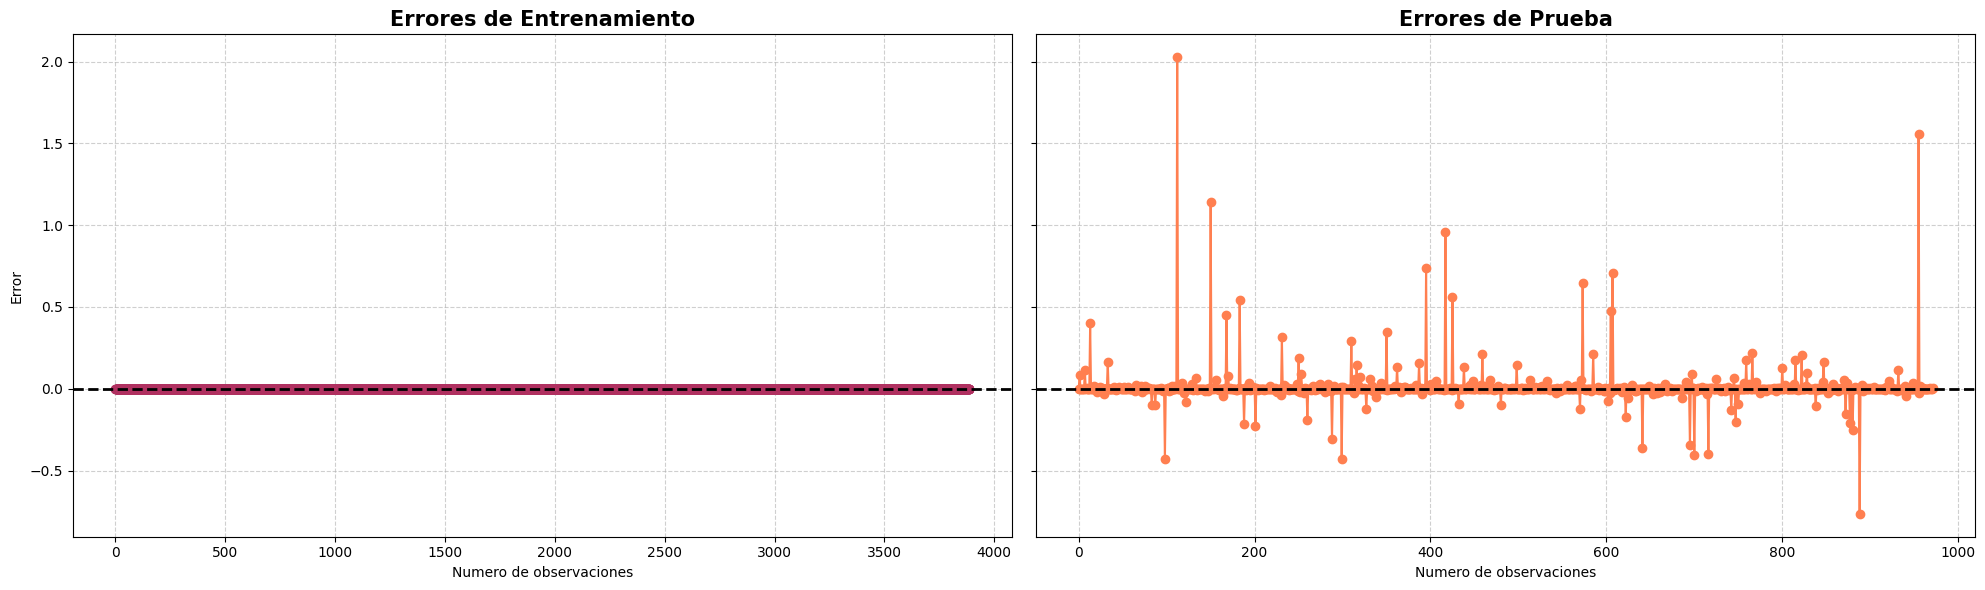

In [38]:
graficar(y_train , y_train_pred , y_test , y_test_pred)

# Model 7: Decision tree using random search to optimize hyperparameters

In [39]:
from sklearn.tree import DecisionTreeRegressor

dic = {'Profundidad' : 0  , 
       'R2_validacion':0,
       'R2_Testeo': 0 ,
       'Split arbol': 0 ,
       'hojas minimas' : 0 }

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)
    ], 
    remainder='passthrough')

target_scaler = StandardScaler()

profundidad = [i for i in range (2,55)]
split = [i for i in range(2,15)]
hojas = [i for i in range(2,15)]

for i in range(100):

    hiper_profundidad = random.choice(profundidad)
    hiper_split = random.choice(split)
    hiper_hojas = random.choice(hojas)

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2)
    
    y_train = target_scaler.fit_transform(y_train) 
    y_test = target_scaler.transform(y_test)

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', DecisionTreeRegressor(max_depth=hiper_profundidad , min_samples_split = hiper_split , min_samples_leaf = hiper_hojas ))])
    
    pipeline.fit(X_train, y_train.ravel()) 

    r2_scores = cross_val_score(pipeline, X_train, y_train.ravel() , cv=5, scoring='r2')

    y_test_pred = pipeline.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)

    r2_media_validacion = r2_scores.mean()

    if r2_media_validacion > dic['R2_validacion'] and r2_test > dic['R2_Testeo']:
        dic['R2_validacion'] = r2_media_validacion
        dic['R2_Testeo'] = r2_test
        dic['Profundidad'] = hiper_profundidad
        dic['Split arbol'] = hiper_split
        dic['hojas minimas'] = hiper_hojas
    else:
        pass 
    if dic['R2_validacion'] >= 0.97 and dic['R2_Testeo'] >= 0.98:
        break
    else:
        pass

print(dic)
    
    


{'Profundidad': 13, 'R2_validacion': 0.9714608926441594, 'R2_Testeo': 0.9851938306091026, 'Split arbol': 2, 'hojas minimas': 5}



### With the hyperparameters found, we run the model with the best hyperparameters

In [29]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)
    ], 
    remainder='passthrough')

target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train) 
y_test = target_scaler.transform(y_test)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', DecisionTreeRegressor(max_depth=13 , min_samples_split = 2 , min_samples_leaf = 5))])

pipeline.fit(X_train, y_train.ravel()) 

r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

print(f"R2 scores para cada fold: {r2_scores}")
print(f"MSE para cada fold: {mse_scores}")
print(f"MAE para cada fold: {mae_scores}")

R2 scores para cada fold: [0.96592188 0.95619094 0.95965802 0.98650532 0.95005338]
MSE para cada fold: [0.02878186 0.04125978 0.03521806 0.03388654 0.05032349]
MAE para cada fold: [0.03278487 0.04533721 0.03706164 0.03283996 0.0479818 ]


### We generate the metrics in the test set

In [30]:

y_test_pred = pipeline.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

metricas = [r2_test , mae_test , mse_test , rmse_test]

print(f"R2 en el conjunto de prueba: {r2_test:.4f}")
print(f"MAE en el conjunto de prueba: {mae_test:.3f}")
print(f"MSE en el conjunto de prueba: {mse_test:.3f}")
print(f"RMSE en el conjunto de prueba: {rmse_test:.3f}")

dic_modelos['Arbol De Decision'] = metricas

R2 en el conjunto de prueba: 0.9649
MAE en el conjunto de prueba: 0.046
MSE en el conjunto de prueba: 0.051
RMSE en el conjunto de prueba: 0.226


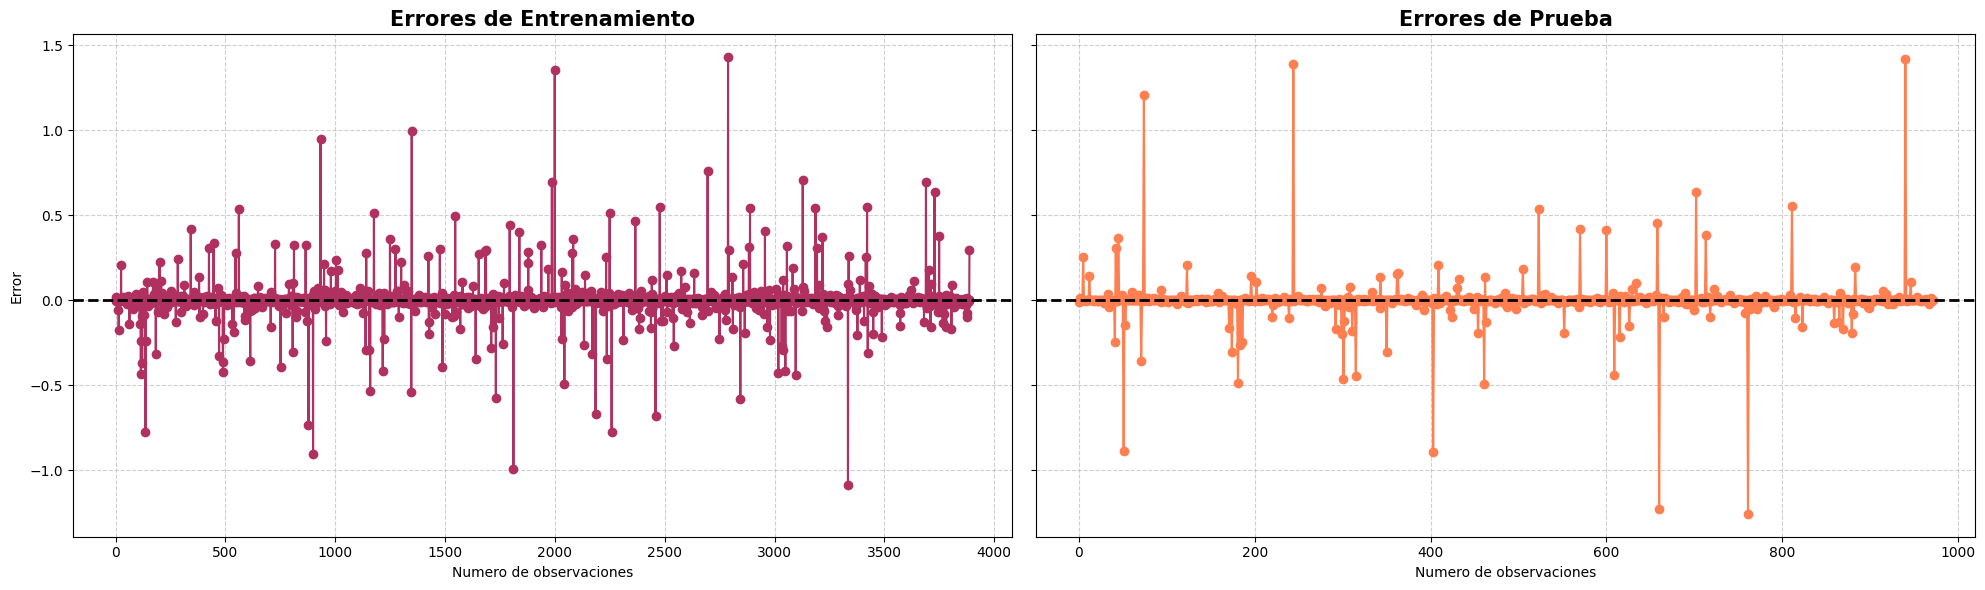

In [42]:
graficar(y_train.flatten() , y_train_pred , y_test.flatten() , y_test_pred)

# Model 7: Bagging using Random Forest and optimizing hyperparameters with "random search"

In [44]:
from sklearn.ensemble import RandomForestRegressor

dic = {'Profundidad' : 0, 
       'R2_validacion':0,
       'R2_Testeo': 0 ,
       'N_arboles': 0 ,
       'min_Split' : 0 ,
       'min_leaf' : 0 }

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)
    ], 
    remainder='passthrough')

target_scaler = StandardScaler()

profundidad = [i for i in range (2,55)]
split = [i for i in range(2,15)]
hojas = [i for i in range(2,15)]
arboles = [i for i in range(2,100)]

for i in range(70):

    hiper_profundidad = random.choice(profundidad)
    hiper_split = random.choice(split)
    hiper_hojas = random.choice(hojas)
    hiper_arboles = random.choice(arboles)

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2)
    
    y_train = target_scaler.fit_transform(y_train) 
    y_test = target_scaler.transform(y_test)

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', RandomForestRegressor(
        n_estimators=hiper_arboles, max_depth=hiper_profundidad, min_samples_split=hiper_split,
        min_samples_leaf=hiper_hojas))])
    
    pipeline.fit(X_train, y_train.ravel()) 

    r2_scores = cross_val_score(pipeline, X_train, y_train.ravel() , cv=5, scoring='r2')

    y_test_pred = pipeline.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)

    r2_media_validacion = r2_scores.mean()

    if r2_media_validacion > dic['R2_validacion'] and r2_test > dic['R2_Testeo']:
        dic['R2_validacion'] = r2_media_validacion
        dic['R2_Testeo'] = r2_test
        dic['Profundidad'] = hiper_profundidad
        dic['min_Split'] = hiper_split
        dic['min_leaf'] = hiper_hojas
        dic['N_arboles'] = hiper_arboles
    else:
        pass 
    if dic['R2_validacion'] >= 0.97 and dic['R2_Testeo'] >= 0.98:
        break
    else:
        pass
    print(i)

print(dic)

0
1
2
3
4
5
6
7
8
9
10
{'Profundidad': 45, 'R2_validacion': 0.9744577232640912, 'R2_Testeo': 0.9840692664642272, 'N_arboles': 38, 'min_Split': 8, 'min_leaf': 5}


### We estimate the forest with the selected hyperparameters

In [31]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)
    ], 
    remainder='passthrough')

target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train.to_numpy()).ravel()
y_test = target_scaler.transform(y_test.to_numpy()).ravel() 

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', RandomForestRegressor(
        n_estimators=38, max_depth=45, min_samples_split=8,
        min_samples_leaf=5 ))])

pipeline.fit(X_train, y_train.ravel())

r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

print(f"R2 scores para cada fold: {r2_scores}")
print(f"MSE para cada fold: {mse_scores}")
print(f"MAE para cada fold: {mae_scores}")

R2 scores para cada fold: [0.97497302 0.98468102 0.97284074 0.96961415 0.97527453]
MSE para cada fold: [0.01415838 0.02417617 0.04275781 0.01932527 0.02214183]
MAE para cada fold: [0.02442547 0.03257245 0.04436067 0.02872655 0.03242116]


### We predict on the test set

In [32]:
y_test_pred = pipeline.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

metricas = [r2_test , mae_test , mse_test , rmse_test]

print(f"R2 en el conjunto de prueba: {r2_test:.4f}")
print(f"MAE en el conjunto de prueba: {mae_test:.3f}")
print(f"MSE en el conjunto de prueba: {mse_test:.3f}")
print(f"RMSE en el conjunto de prueba: {rmse_test:.3f}")

dic_modelos['Random Forest'] = metricas

R2 en el conjunto de prueba: 0.9818
MAE en el conjunto de prueba: 0.029
MSE en el conjunto de prueba: 0.021
RMSE en el conjunto de prueba: 0.143


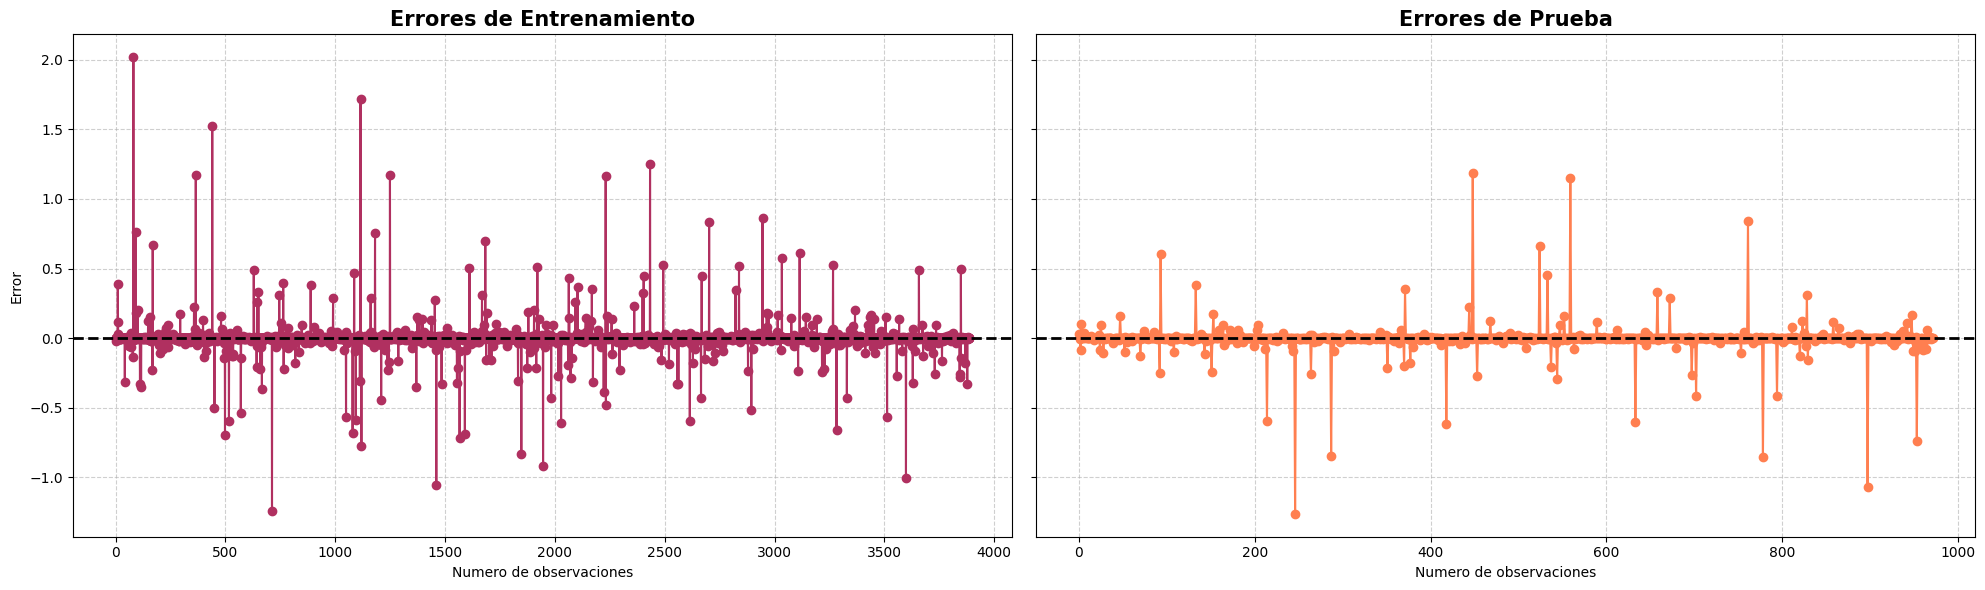

In [48]:
graficar(y_train.flatten() , y_train_pred , y_test.flatten() , y_test_pred)

# Model 8: Boosting Methods. Especially GradientBoosting, optimizing hyperparameters.

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

dic = {'R2_validacion':0,
       'R2_Testeo': 0 ,
       'N_arboles': 0 ,
       'max_depth' : 0 ,
       'learning_rate' : 0 }

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)
    ], 
    remainder='passthrough')

target_scaler = StandardScaler()

profundidad = [i for i in range(2,25)]
arboles = [i for i in range(2,100)]

for i in range(70):

    hiper_profundidad = random.choice(profundidad)
    hiper_arboles = random.choice(arboles)

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2)
    
    y_train = target_scaler.fit_transform(y_train) 
    y_test = target_scaler.transform(y_test)

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', GradientBoostingRegressor(n_estimators=hiper_arboles, max_depth=hiper_profundidad))])
    
    pipeline.fit(X_train, y_train.ravel()) 

    r2_scores = cross_val_score(pipeline, X_train, y_train.ravel() , cv=5, scoring='r2')

    y_test_pred = pipeline.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)

    r2_media_validacion = r2_scores.mean()

    if r2_media_validacion > dic['R2_validacion'] and r2_test > dic['R2_Testeo']:
        dic['R2_validacion'] = r2_media_validacion
        dic['R2_Testeo'] = r2_test
        dic['max_depth'] = hiper_profundidad
        dic['N_arboles'] = hiper_arboles
    else:
        pass 
    if dic['R2_validacion'] >= 0.97 and dic['R2_Testeo'] >= 0.98:
        break
    else:
        pass
    
    print(dic , i)

print(dic)

{'R2_validacion': 0.9707675820271424, 'R2_Testeo': 0.9824071102525713, 'N_arboles': 58, 'max_depth': 9, 'learning_rate': 0}


### Use the selected hyperparameters

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)
    ], 
    remainder='passthrough')

target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train.to_numpy()).ravel()
y_test = target_scaler.transform(y_test.to_numpy()).ravel() 

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', GradientBoostingRegressor(n_estimators=58, max_depth=9))])

pipeline.fit(X_train, y_train.ravel())

r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

print(f"R2 scores para cada fold: {r2_scores}")
print(f"MSE para cada fold: {mse_scores}")
print(f"MAE para cada fold: {mae_scores}")

R2 scores para cada fold: [0.97542563 0.97851994 0.99109324 0.96801826 0.93942893]
MSE para cada fold: [0.01440042 0.02158216 0.01167464 0.04385977 0.04585814]
MAE para cada fold: [0.02530197 0.02816026 0.02564768 0.0425403  0.03795132]


### We predict on the test set

In [34]:
y_test_pred = pipeline.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

metricas = [r2_test , mae_test , mse_test , rmse_test]

print(f"R2 en el conjunto de prueba: {r2_test:.4f}")
print(f"MAE en el conjunto de prueba: {mae_test:.3f}")
print(f"MSE en el conjunto de prueba: {mse_test:.3f}")
print(f"RMSE en el conjunto de prueba: {rmse_test:.3f}")

dic_modelos['GradientBoostig'] = metricas

R2 en el conjunto de prueba: 0.9733
MAE en el conjunto de prueba: 0.032
MSE en el conjunto de prueba: 0.026
RMSE en el conjunto de prueba: 0.161


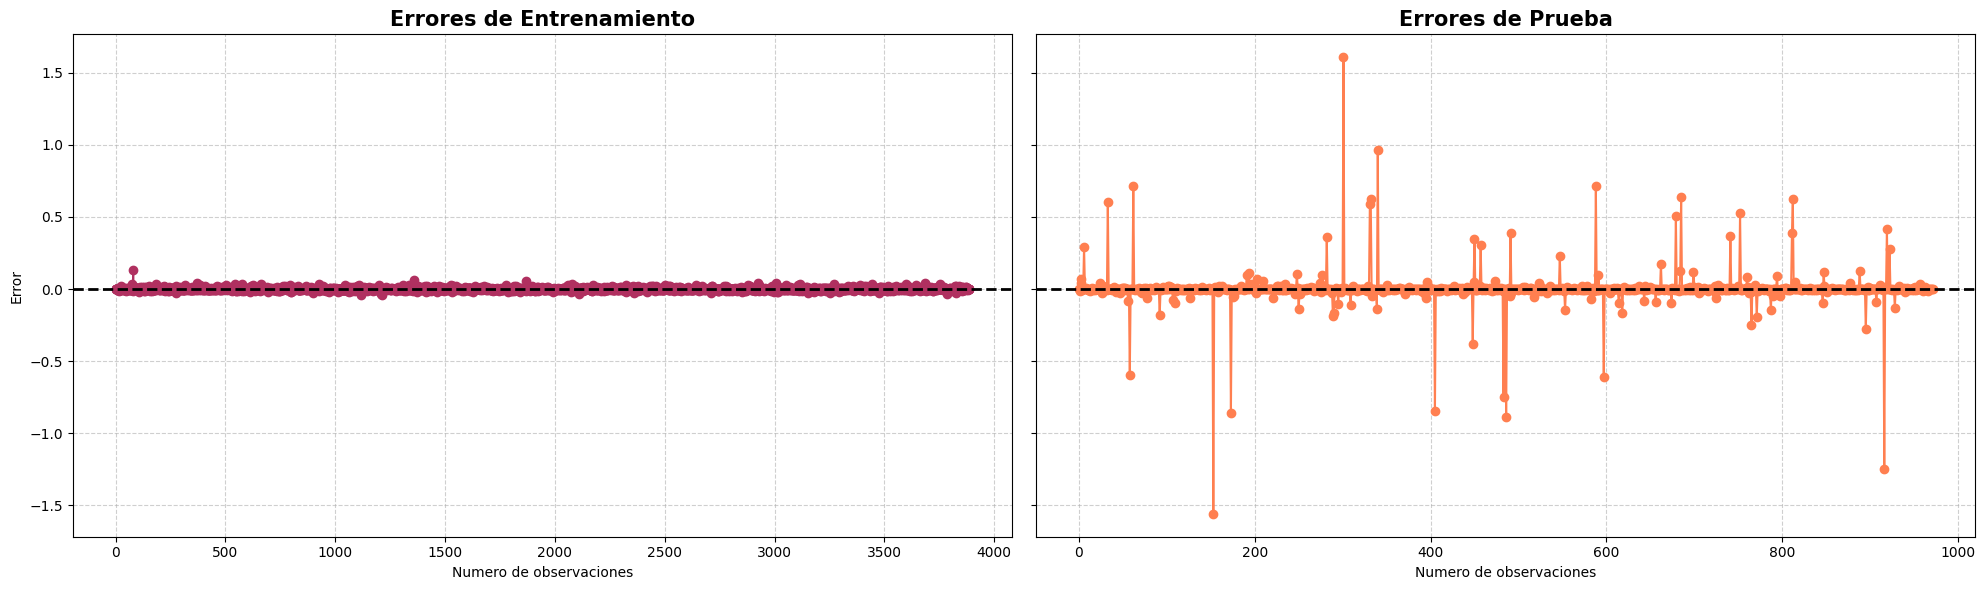

In [54]:
graficar(y_train.flatten() , y_train_pred , y_test.flatten() , y_test_pred)

# Model8: Boosting Methods. Especially XGBoost optimizing hyperparameters.

In [114]:
from xgboost import XGBRegressor
import random

dic = {'R2_validacion':0,
       'R2_Testeo': 0 ,
       'N_arboles': 0 ,
       'max_depth' : 0 ,
       'Gamma':0}

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)
    ], 
    remainder='passthrough')

target_scaler = StandardScaler()

profundidad = [i for i in range(2,25)]
arboles = [i for i in range(2,300)]
gamma =  np.linspace(0, 0.5, 20)

for i in range(70):

    hiper_profundidad = random.choice(profundidad)
    hiper_arboles = random.choice(arboles)
    hiper_gamma = random.choice(gamma)

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2)
    
    y_train = target_scaler.fit_transform(y_train) 
    y_test = target_scaler.transform(y_test)

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', XGBRegressor(n_estimators=hiper_arboles, max_depth=hiper_profundidad , objective='reg:squarederror' ,gamma = hiper_gamma))])
    
    pipeline.fit(X_train, y_train.ravel()) 

    r2_scores = cross_val_score(pipeline, X_train, y_train.ravel() , cv=5, scoring='r2')

    y_test_pred = pipeline.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)

    r2_media_validacion = r2_scores.mean()

    if r2_media_validacion > dic['R2_validacion'] and r2_test > dic['R2_Testeo']:
        dic['R2_validacion'] = r2_media_validacion
        dic['R2_Testeo'] = r2_test
        dic['max_depth'] = hiper_profundidad
        dic['N_arboles'] = hiper_arboles
        dic['Gamma'] = hiper_gamma
        print(dic , i)
    else:
        pass 
    if dic['R2_validacion'] >= 0.98 and dic['R2_Testeo'] >= 0.98:
        break
    else:
        pass

print(dic)


{'R2_validacion': 0.9761522332186164, 'R2_Testeo': 0.9880831648330332, 'N_arboles': 91, 'max_depth': 18, 'Gamma': 0.3684210526315789} 0
{'R2_validacion': 0.9763292803646209, 'R2_Testeo': 0.9927478094153929, 'N_arboles': 266, 'max_depth': 17, 'Gamma': 0.21052631578947367} 16
{'R2_validacion': 0.9763292803646209, 'R2_Testeo': 0.9927478094153929, 'N_arboles': 266, 'max_depth': 17, 'Gamma': 0.21052631578947367}


### We run the model with the best hyperparameters

In [115]:
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)
    ], 
    remainder='passthrough')

target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train.to_numpy()).ravel()
y_test = target_scaler.transform(y_test.to_numpy()).ravel() 

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', XGBRegressor(n_estimators=266, max_depth=17 , objective='reg:squarederror' , gamma = 0.21052631578947367))])

pipeline.fit(X_train, y_train)

r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

print(f"R2 scores para cada fold: {r2_scores}")
print(f"MSE para cada fold: {mse_scores}")
print(f"MAE para cada fold: {mae_scores}")

R2 scores para cada fold: [0.97224363 0.9771411  0.96913479 0.97678886 0.97611804]
MSE para cada fold: [0.03908938 0.02600185 0.02466399 0.01876366 0.02008291]
MAE para cada fold: [0.04628648 0.04290184 0.03707486 0.03528734 0.04028922]



### We predict on the test set

In [116]:
y_test_pred = pipeline.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

metricas = [r2_test , mae_test , mse_test , rmse_test]

print(f"R2 en el conjunto de prueba: {r2_test:.4f}")
print(f"MAE en el conjunto de prueba: {mae_test:.3f}")
print(f"MSE en el conjunto de prueba: {mse_test:.3f}")
print(f"RMSE en el conjunto de prueba: {rmse_test:.3f}")

dic_modelos['XGBoost'] = metricas

R2 en el conjunto de prueba: 0.9901
MAE en el conjunto de prueba: 0.037
MSE en el conjunto de prueba: 0.015
RMSE en el conjunto de prueba: 0.122


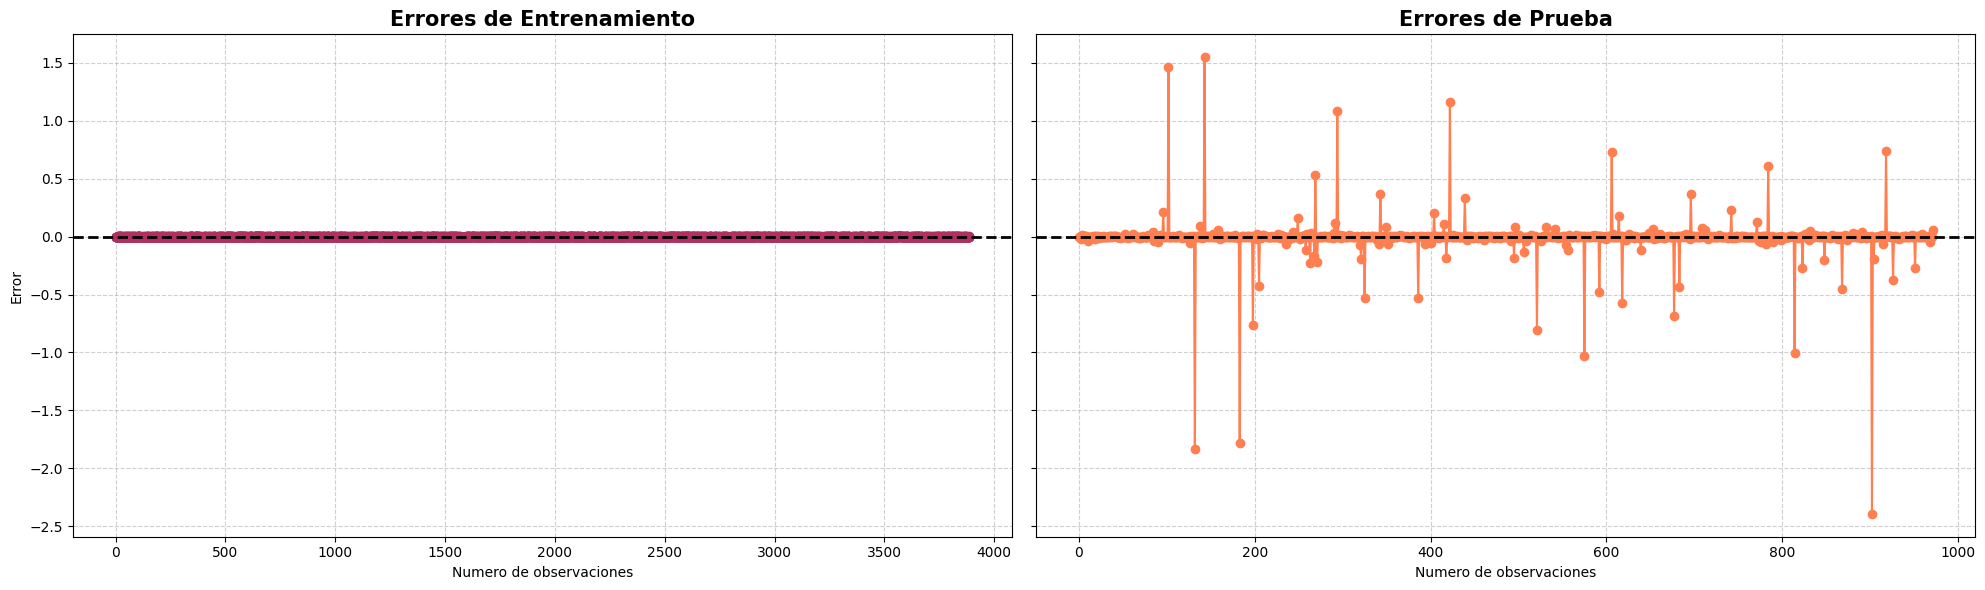

In [11]:
graficar(y_train.flatten() , y_train_pred , y_test.flatten() , y_test_pred)

# Model 10: Support Vector Machines with Kernel

In [ ]:
from sklearn.svm import SVR
import numpy as np
import random 

x1 = x[['Hurtos' , 'Area Rural' , 'Area Agua' , 'Area Urbana' , 'Distancia a accseos' , 'importancia accesos' , 'Pib Ponderado' , 'Establecimientos de turismo' , 'Otros Gastos Diario']]
x_labels1 = [col for col in x_labels if col in x1.columns]

dic = {'R2_validacion':0,
       'R2_Testeo': 0 ,
       'C': 0 ,
       'kernel' : 0 ,
       'epsilon': 0}

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels1),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels1)
    ], 
    remainder='passthrough')

target_scaler = StandardScaler()

kernel = ['linear']
epsilon = np.linspace(0.001, 1, 20).tolist()

for i in range(70):

    hiper_kernel = random.choice(kernel)
    hiper_epsilon = random.choice(epsilon)

    X_train, X_test, y_train, y_test = train_test_split(
        x1, y, test_size=0.2)
    
    y_train = target_scaler.fit_transform(y_train) 
    y_test = target_scaler.transform(y_test)

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', SVR(kernel=hiper_kernel, epsilon=hiper_epsilon))])
    
    pipeline.fit(X_train, y_train.ravel()) 

    r2_scores = cross_val_score(pipeline, X_train, y_train.ravel() , cv=5, scoring='r2')

    y_test_pred = pipeline.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)

    r2_media_validacion = r2_scores.mean()

    if r2_media_validacion > dic['R2_validacion'] and r2_test > dic['R2_Testeo']:
        dic['R2_validacion'] = r2_media_validacion
        dic['R2_Testeo'] = r2_test
        dic['kernel'] = hiper_kernel
        dic['epsilon'] = hiper_epsilon
    else:
        pass 
    if dic['R2_validacion'] >= 0.98 and dic['R2_Testeo'] >= 0.98:
        break
    else:
        pass
    print(dic , i)

print(dic)



In [ ]:
from scipy.stats import uniform, randint
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

x1 = x[['Hurtos' , 'Area Rural' , 'Area Agua' , 'Area Urbana' , 'Distancia a accseos' , 'importancia accesos' , 'Pib Ponderado' , 'Establecimientos de turismo' , 'Otros Gastos Diario']]
x_labels1 = [col for col in x_labels if col in x1.columns]
X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels1),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels1)
    ], 
    remainder='passthrough')

target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()
y_test = target_scaler.transform(y_test.to_numpy().reshape(-1, 1)).ravel() 

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

param_distributions = {
    'regressor__C': uniform(0.1, 1000),  
    'regressor__epsilon': uniform(0.01, 1),  
    'regressor__kernel': ['linear', 'rbf', 'poly'],  
    'regressor__gamma': ['scale', 'auto'] + list(uniform(0.001, 1).rvs(10))  
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=5,  
    cv=5,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1  
)
random_search.fit(X_train, y_train)
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

print(f"Mejor puntuación R²: {random_search.best_score_:.4f}")

best_pipeline = random_search.best_estimator_

r2_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring='r2')
mse_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

print("\nValidación cruzada con los mejores hiperparámetros:")
print(f"R² scores para cada fold: {r2_scores}")
print(f"MSE para cada fold: {mse_scores}")
print(f"MAE para cada fold: {mae_scores}")

### NOTE on SVM Exclusion

We attempted to train Support Vector Machines (with and without kernels) using both our custom implementation and scikit-learn. In every case, each model required **over 2 hours** to complete. Meanwhile, our existing regression models were already delivering excellent error metrics that SVMs could barely improve (at best by ~0.01 in R²).

- **Computational Cost vs. Benefit:** Waiting two hours for, at most, a marginal gain in R² is not defensible.  
- **Diminishing Returns:** The incremental error reduction offered by SVMs does not justify the extreme training times.  
- **Decision:** We **exclude SVM** from our final comparison. Prioritizing models with strong performance **and** reasonable runtimes ensures our solution remains both accurate and practical.



# Choosing the best model

In [117]:

df_metrics = pd.DataFrame.from_dict(
    dic_modelos, 
    orient='index',
    columns=['R2', 'MAE', 'MSE', 'RMSE']
)
df_metrics

,R2,MAE,MSE,RMSE
Regresion Lineal,0.894635,0.148427,0.126965,0.356322
Regresion Polinomica,-5.770665,0.146951,7.628211,2.761922
Regresion Lasso,0.912567,0.083715,0.094890,0.308042
Regresion Elastic Net,0.973735,0.059358,0.017324,0.131620
KNN,0.989039,0.022543,0.010927,0.104532
Arbol De Decision,0.964905,0.046430,0.050889,0.225585
Random Forest,0.981797,0.029076,0.020568,0.143415
GradientBoostig,0.973294,0.031726,0.026055,0.161417
XGBoost,0.990129,0.037135,0.014991,0.122437
Regresion Ridge,0.897979,0.167590,0.170048,0.412368


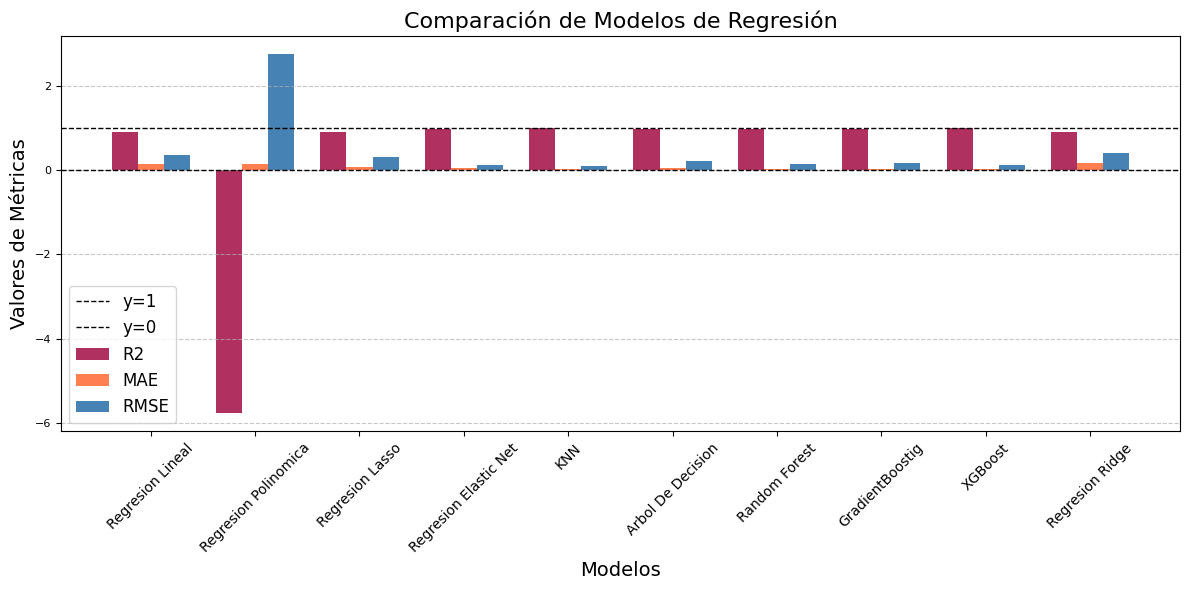

In [118]:
import numpy as np
import matplotlib.pyplot as plt


metrics = ['R2', 'MAE', 'RMSE']
color = ['#B03060', '#FF7F50', '#4682B4']
bar_width = 0.25
x = np.arange(len(df_metrics))

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, df_metrics[metric], width=bar_width, label=metric, color=color[i])

plt.axhline(y=1, color='black', linestyle='--', linewidth=1, label='y=1')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='y=0')
plt.title('Comparación de Modelos de Regresión', fontsize=16)
plt.xlabel('Modelos', fontsize=14)
plt.ylabel('Valores de Métricas', fontsize=14)
plt.xticks(x + bar_width, df_metrics.index, rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



## Final Model Selection: XGBoost

When comparing all candidate models, our selection criteria were:

1. **R² as close to 1 as possible**  
2. **MAE and RMSE as close to 0 as possible**  
3. **Reasonable training time and scalability**

| Model                   | R²      | MAE     | RMSE    |
|-------------------------|---------|---------|---------|
| **KNN**                 | 0.9890  | 0.0225  | 0.1045  |
| **XGBoost**             | 0.9901  | 0.0371  | 0.1224  |

Both **KNN** and **XGBoost** achieve exceptional predictive performance, far outperforming all linear and regularized regressions (and vastly better than the polynomial baseline). However:

- **KNN** delivers slightly lower MAE/RMSE but suffers from high inference cost on large datasets (distance computations scale poorly).  
- **XGBoost** attains the highest R² with only marginally higher MAE/RMSE, yet it trains in minutes, handles missing values and categorical splits natively, and provides built-in feature importance.

**Conclusion:**  
We select **XGBoost** as our primary forecasting model. It strikes the optimal balance of **accuracy**, **execution time**, and **model complexity**, making it both robust in production and flexible enough to capture non-linear interactions without manual feature engineering.

---

## Regression ML Models vs. “Pure” ML Learners

1. **Interpretability & Simplicity**  
   - **Linear/Ridge/Lasso/Elastic Net**: Offer clear coefficient estimates and straightforward diagnostics, ideal for hypothesis testing and transparent reporting.  
   - **ML Models (KNN, XGBoost)**: Capture complex feature interactions automatically but require additional tools (SHAP, partial dependence) to interpret.

2. **Feature Engineering**  
   - **Regression**: Relies heavily on manually crafted polynomial or interaction terms to model non-linearity.  
   - **Tree-based ML**: Inherently models non-linear splits and high-order interactions without explicit transformations.

3. **Scalability & Runtime**  
   - **KNN**: Minimal training cost but expensive at prediction time; scales poorly with sample size.  
   - **XGBoost**: Optimized gradient boosting that trains in parallel, scales to large datasets, and provides fast inference.

4. **Generalization & Regularization**  
   - **Lasso/Elastic Net**: Control overfitting via penalty terms but can underfit if overly constrained.  
   - **XGBoost**: Includes regularization parameters (shrinkage, tree depth, subsampling) and early stopping to balance bias/variance dynamically.

By moving from parametric regressions to advanced learners like XGBoost, we gain **predictive power** and **automation** at the cost of some interpretability—an acceptable trade-off given the significant performance improvements and practical training times.  
***

# Comparing XGBoost with a basic econometric linear regression

## 1. Basic Econometric Benchmark

We start with a very simple autoregressive specification augmented by economic fundamentals:

$$
N_{t} = \beta_0 \;+\; \beta_1\,N_{t-1} \;+\; \beta_2\,\mathrm{GDP}_{t-1} \;+\;\varepsilon_t
$$

- **$N_t$**: Tourist arrivals in period $t$.  
- **$N_{t-1}$**: Lagged arrivals (captures persistence and seasonality).  
- **$\mathrm{GDP}_{t-1}$**: Lagged weighted GDP (proxy for economic capacity).  
- **$\varepsilon_t$**: Idiosyncratic error term.

We estimate this model by Ordinary Least Squares (OLS) and evaluate:

- **Coefficient significance** ($t$-stats and $p$-values)  
- **Overall fit** (Adjusted $R^2$)  
- **Forecast accuracy** (out-of-sample MAE, RMSE)  

---

### 2. Econometric vs. Machine Learning Comparison

Once the baseline OLS results are in hand, we will:

1. **Compare Goodness-of-Fit**  
   - Adjusted $R^2$ of the econometric model vs. the $R^2$ of our best ML learner (XGBoost).

2. **Evaluate Predictive Errors**  
   - Out-of-sample MAE and RMSE from the OLS regression vs. KNN, Random Forest, XGBoost, etc.

3. **Assess Trade-offs**  
   - **Interpretability:** OLS coefficients vs. tree-based feature importances.  
   - **Complexity & Runtime:** Seconds of OLS estimation vs. minutes (or hours) for more complex learners.  
   - **Robustness:** Sensitivity to outliers, non-linearities, and changing data regimes.

By laying out these metrics side by side, we objectively determine whether the marginal gains from modern ML methods justify their extra complexity and computational cost, or if the classical econometric approach remains defensible for tourism forecasting.  


In [7]:

import statsmodels.api as sm
base_regresion1 = base_regresion.copy()

# Crear las variables rezagadas
base_regresion1['Nmero Extranjeros_l1'] = base_regresion1['Nmero Extranjeros'].shift(1)  
base_regresion1['Nmero Extranjeros_l2'] = base_regresion1['Nmero Extranjeros'].shift(2) 
base_regresion1['Pib Ponderado_l1'] = base_regresion1['Pib Ponderado'].shift(1)

# Eliminar filas con NaN
base_regresion1 = base_regresion1.dropna()

# Definir la variable dependiente e independientes a partir de los datos limpios
y = base_regresion1['Nmero Extranjeros']
X = base_regresion1[['Nmero Extranjeros_l1', 'Nmero Extranjeros_l2', 'Pib Ponderado_l1']]

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:      Nmero Extranjeros   R-squared (uncentered):                   0.048
Model:                            OLS   Adj. R-squared (uncentered):              0.047
Method:                 Least Squares   F-statistic:                              80.99
Date:                Sun, 09 Mar 2025   Prob (F-statistic):                    4.03e-51
Time:                        01:20:46   Log-Likelihood:                         -53062.
No. Observations:                4858   AIC:                                  1.061e+05
Df Residuals:                    4855   BIC:                                  1.061e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

### Key Takeaways from the Basic OLS Model

1. **Very Low Explanatory Power**  
   - The uncentered R² is only **0.048**, meaning this specification—including two lags of tourist arrivals and one lag of GDP—explains less than 5% of the variation in foreign arrivals.  
   - Despite highly significant coefficients (all p-values < 0.001), the model’s overall fit remains poor, signaling that essential drivers of tourism (infrastructure, connectivity, safety, seasonality, etc.) are missing.

2. **Coefficient Interpretations**  
   - **Lagged GDP ($\beta_2 = 0.97$)**: Nearly one-for-one impact—last month’s economic activity is strongly associated with this month’s foreign arrivals.  
   - **First Lag of Arrivals ($\beta_1 = -0.19$)**: A negative effect suggests a short-term downward correction after a peak month.  
   - **Second Lag of Arrivals ($\beta_2 = +0.19$)**: A positive rebound effect two months after high arrivals, reflecting cyclical momentum in tourist flows.

3. **Residual Diagnostics**  
   - **Durbin–Watson ≈ 1.97**: No serious autocorrelation in residuals.  
   - **Omnibus & Jarque–Bera (p ≈ 0)**, **Skew = 6.33**, **Kurtosis = 49.06**: Strong non-normality and heavy tails in the error distribution, undermining confidence intervals and hypothesis tests.

---

**Conclusion:**  
This simple autoregressive-economic model captures only a sliver of tourism dynamics. Its low R² and non-normal residuals indicate severe under-specification. To build a more reliable forecasting framework, we must incorporate additional explanatory factors—and/or adopt more flexible methods (e.g., machine-learning algorithms) that can model non-linear interactions and richer temporal patterns.  


## Third Econometric Model

We test a simple contemporaneous specification:

\begin{equation}
\text{N}_{t} = \beta_0 + \beta_1  \cdot \text{PIB}_{t} + \epsilon_t
\end{equation}

By regressing current tourist arrivals directly on current GDP, we isolate the immediate economic effect without dynamics. This model serves as a benchmark to gauge how much of the variation in inbound tourism can be explained purely by contemporaneous economic activity.  

In [101]:
base_regresion1 = base_regresion.copy()

y = base_regresion1['Nmero Extranjeros'] 
X = base_regresion1[['Pib Ponderado' ]]  
X = sm.add_constant(X)  
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:      Nmero Extranjeros   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 1.933e+04
Date:              mar., 26 nov. 2024   Prob (F-statistic):               0.00
Time:                        18:25:52   Log-Likelihood:                -49193.
No. Observations:                4860   AIC:                         9.839e+04
Df Residuals:                    4858   BIC:                         9.840e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -596.6020     89.892     -6.637

### Brief Conclusion for the Second OLS Model

- **Strong Fit:** With an R² of **0.799**, current weighted GDP alone explains nearly 80% of the variation in monthly foreign arrivals.  
- **Economic Impact:** The coefficient on GDP (€β₁ = 3.8334**) is highly significant (p < 0.001), implying that a one-unit increase in GDP corresponds to roughly 3.83 additional tourists.  
- **Intercept Interpretation:** The negative constant (–596.6) has no practical interpretation here other than adjusting the regression line; it underscores that zero GDP would predict a negative arrival count, which is outside the data’s realistic range.  
- **Residual Concerns:** Despite the high R², residual diagnostics (Omnibus, Jarque–Bera) reveal strong non-normality and heavy tails, indicating that omitted factors (seasonality, infrastructure, safety, etc.) and heteroskedasticity remain unaddressed.

**Implication:** While this simple contemporaneous specification captures the bulk of tourism fluctuations through economic activity, its lack of dynamic and non-economic variables suggests room for improved forecasting using richer models.  


##  Fourth Econometric Model

We now estimate an alternative specification that omits GDP and instead leverages variables commonly reported by DANE and other open‐data sources:

$$
N_{\text{Foreign}} = \beta_0 \;+\; \beta_1\,\text{Homicides} \;+\; \beta_2\,\text{AvgTripSpend} \;+\; \beta_3\,\text{TourismEstablishments} \;+\; \beta_4\,\text{ExchangeRate} \;+\; \beta_5\,\text{Temperature} \;+\; \beta_6\,\text{Inflation} \;+\;\varepsilon
$$

By incorporating crime rates, average tourist spending, tourism infrastructure, currency movements, local climate, and price dynamics, this model aims to capture a broader set of non‐macroeconomic drivers of foreign arrivals.  



In [16]:
base_regresion1 = base_regresion.copy()
import statsmodels.api as sm

y = base_regresion1['Nmero Extranjeros'] 
X = base_regresion1[['Homicidios' , 'Gasto Promedio Viaje' , 'Establecimientos de turismo' , 'Dolar' , 'Temperatura' , 'Inflacion']]  
X = sm.add_constant(X)  
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:      Nmero Extranjeros   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1476.
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        00:05:12   Log-Likelihood:                -50571.
No. Observations:                4860   AIC:                         1.012e+05
Df Residuals:                    4853   BIC:                         1.012e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Key Takeaways from the Third OLS Model

1. **Moderate Explanatory Power**  
   - **R² = 0.646**: This specification—using crime, spending, infrastructure, exchange rate, temperature, and inflation—explains about 65% of the variation in monthly foreign arrivals. It outperforms the basic autoregressive model but remains below the simple contemporaneous GDP model (R² ≈ 0.80).

2. **Significant Predictors & Interpretations**  
   - **Homicides (β₁ ≈ 383)**: Surprisingly, higher homicide counts are associated with more tourists. This likely reflects that major urban hubs—where both crime rates and visitor inflows are high—drive this positive relationship rather than implying crime attracts tourism.  
   - **Avg. Trip Spend (β₂ ≈ 0.0054)**: Every additional COP 1 of average spending corresponds to about 0.0054 more arrivals. In practice, a COP 100,000 increase in per-trip spend predicts ~540 additional tourists.  
   - **Tourism Establishments (β₃ ≈ 36.5)**: Each extra lodging or recreational venue is linked to roughly 36 more arrivals, underscoring infrastructure’s direct pull on visitor numbers.  
   - **Exchange Rate (β₄ ≈ −3.18)**: A weaker peso (higher USD/COP) depresses arrivals by about 3 tourists per COP 1 increase, highlighting price sensitivity among international travelers.  
   - **Temperature (β₅ ≈ −302.8)**: Warmer cities attract fewer visitors—each 1 °C rise corresponds to ~303 fewer arrivals—reflecting a preference for milder climates or the concentration of tourism in cooler highland destinations.  
   - **Inflation (β₆ ≈ 186.7)**: Higher inflation correlates with more arrivals, possibly because inflation spikes coincide with economic rebounds and promotional campaigns in major markets.

3. **Residual Diagnostics**  
   - **Durbin–Watson ≈ 1.92**: No serious autocorrelation in residuals.  
   - **Non-normality & Heavy Tails**: Omnibus and Jarque–Bera tests (p ≈ 0) indicate strong departures from normality, suggesting outliers and heteroskedasticity that may bias standard errors.

---

**Conclusion:**  
This expanded econometric model leverages readily available open-data variables to capture diverse drivers of tourism, achieving respectable fit without relying on GDP. However, its performance still falls short of a pure GDP regression, and the non-economic variables partly proxy for city size and climatic appeal rather than isolating causal effects. For more accurate and robust forecasting, combining such econometric insights with flexible machine-learning methods (e.g., XGBoost) can help model complex, non-linear interactions that this linear framework cannot fully capture.  


### Final Panel Regression: Random Effects Specification

To fully leverage our panel structure and control for unobserved, time-invariant city characteristics, we will estimate a **Random Effects** model using the following setup:

- **Dependent variable**:  
  $$
    y_{it} = 'Nmero Extranjeros'
  $$
- **Independent variables**:  
  $$
    X_{it} = \{\,\text{Homicidios},\;\text{Gasto Promedio Viaje},\;\text{Establecimientos de turismo},\;\text{Dólar},\;\text{Temperatura},\;\text{Pib Ponderado}\}
  $$

Our specification is therefore:
$$
  N_{it} = \alpha + \beta_1\,\text{Homicidios}_{it} + \beta_2\,\text{GastoPromedioViaje}_{it} + \beta_3\,\text{Establecimientos}_{it} + \beta_4\,\text{Dólar}_{it} + \beta_5\,\text{Temperatura}_{it} + \beta_6\,\text{Pib Ponderado}_{it} + u_i + \varepsilon_{it}
$$

Where:
- $u_i$ captures the random, time-invariant effect for each city (e.g., geographic location, baseline tourism appeal).
- $\varepsilon_{it}$ is the idiosyncratic error term.

**Why Random Effects?**  
- **Contemporaneous structure**: We pool all cross-sectional (city) and time-series (monthly) variation to increase efficiency.  
- **Fixed heterogeneity**: By treating city effects as random, we acknowledge persistent differences across municipalities without losing degrees of freedom.  
- **Model comparison**: We can benchmark its performance (R², RMSE, Hausman test) against our OLS and machine-learning models to see whether accounting for panel structure yields better fit or different coefficient estimates.

This final econometric exercise will reveal how much the inclusion of latent city-level heterogeneity improves our understanding of tourism dynamics.  


In [25]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import RandomEffects

# Supongamos que 'base_regresion' tiene columnas 'entidad' y 'tiempo' que identifican el panel.
base_regresion1 = base_regresion.copy()
base_regresion1['Fecha'] = pd.to_datetime(base_regresion1['Mes'], format='%m-%Y')

# Configuramos el índice para datos de panel (reemplaza 'entidad' y 'tiempo' por los nombres reales)
base_regresion1 = base_regresion1.set_index(['Ciudad', 'Fecha'])

# Definir la variable dependiente e independientes
y = base_regresion1['Nmero Extranjeros']
X = base_regresion1[['Homicidios', 'Gasto Promedio Viaje', 'Establecimientos de turismo', 'Dolar', 'Temperatura', 'Pib Ponderado' ]]
X = sm.add_constant(X)

# Ajustar el modelo de efectos aleatorios
model_re = RandomEffects(y, X)
re_results = model_re.fit()

print(re_results)

                        RandomEffects Estimation Summary                        
Dep. Variable:      Nmero Extranjeros   R-squared:                        0.3800
Estimator:              RandomEffects   R-squared (Between):              0.8450
No. Observations:                4860   R-squared (Within):               0.2695
Date:                Sun, Mar 09 2025   R-squared (Overall):              0.7776
Time:                        01:39:26   Log-likelihood                -4.724e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      495.82
Entities:                          81   P-value                           0.0000
Avg Obs:                       60.000   Distribution:                  F(6,4853)
Min Obs:                       60.000                                           
Max Obs:                       60.000   F-statistic (robust):             495.82
                            

### Random Effects Model: Key Insights

- **Explained Variance**  
  - **Overall R² = 0.7776**: The model accounts for nearly 78% of the total variation in foreign arrivals when pooling across all cities and months.  
  - **Between R² = 0.8450**: Cross‐sectional differences (i.e., persistent city attributes such as location, historical tourism appeal, and infrastructure) explain over 84% of the variation between cities.  
  - **Within R² = 0.2695**: Only about 27% of the month-to-month fluctuations within each city are captured, indicating that unobserved time-variant shocks and seasonality remain largely unexplained.

- **Robust Drivers**  
  - **Weighted GDP (β ≈ 2.48, p < 0.001):** Continues to be the most powerful predictor—each unit rise in GDP predicts roughly 2.5 more tourists, even after controlling for fixed city effects.  
  - **Exchange Rate (β ≈ –0.60, p < 0.001):** A weaker peso dampens arrivals, reflecting the sensitivity of international visitors to relative costs.

- **Variables Losing Significance**  
  - **Homicides & Temperature:** Both become statistically insignificant once city-level heterogeneity is accounted for, suggesting that enduring differences between cities (rather than within-city crime spikes or temperature swings) drive their tourism performance.  
  - **Other Controls (e.g., infrastructure counts, spending):** Show reduced within-city effects, implying their primary influence lies in creating a long-term comparative advantage rather than explaining short-term variations.

- **Policy & Modeling Implications**  
  - **Focus on Long-Run Fundamentals:** Investments that enhance a city’s baseline economic capacity and maintain competitive pricing will yield the greatest impact on foreign arrivals.  
  - **Supplement with Dynamic Methods:** To improve month-to-month forecasting accuracy, we should integrate dynamic panel techniques or non-parametric models that can better capture seasonality, exogenous shocks, and non-linear interactions.

Overall, the Random Effects specification confirms the primacy of stable, structural factors in explaining international tourism flows, while highlighting the need for complementary approaches to address within-city dynamics.  


# New XGBoost With the same variables of the Econometrics Regressions

In [112]:
base_regresion1 = base_regresion.copy()
y = base_regresion1['Nmero Extranjeros'] 
x = base_regresion1[['Homicidios' , 'Gasto Promedio Viaje' , 'Establecimientos de turismo' , 'Dolar' , 'Temperatura' , 'Inflacion']]

x_labels = [col for col in x_labels if col in x.columns]

dic = {'R2_validacion':0,
       'R2_Testeo': 0 ,
       'N_arboles': 0 ,
       'max_depth' : 0 ,
       'Gamma':0}

target_scaler = StandardScaler()

profundidad = [i for i in range(2,25)]
arboles = [i for i in range(2,500)]
gamma =  [0, 0.1, 0.2, 0.3, 0.4]

for i in range(70):

    hiper_profundidad = random.choice(profundidad)
    hiper_arboles = random.choice(arboles)
    hiper_gamma = random.choice(gamma)

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2)
    
    preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_labels),  
        ('poly', PolynomialFeatures(degree=1, include_bias=False), x_labels)
    ], 
    remainder='passthrough')


    y_train= target_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test = target_scaler.transform(y_test.values.reshape(-1, 1)).ravel()    

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('regressor', XGBRegressor(n_estimators=hiper_arboles, max_depth=hiper_profundidad , objective='reg:squarederror' , gamma = hiper_gamma))])
    
    pipeline.fit(X_train, y_train.ravel()) 

    r2_scores = cross_val_score(pipeline, X_train, y_train.ravel() , cv=5, scoring='r2')

    y_test_pred = pipeline.predict(X_test)

    r2_test = r2_score(y_test, y_test_pred)

    r2_media_validacion = r2_scores.mean()

    if r2_media_validacion > dic['R2_validacion'] and r2_test > dic['R2_Testeo']:
        dic['R2_validacion'] = r2_media_validacion
        dic['R2_Testeo'] = r2_test
        dic['max_depth'] = hiper_profundidad
        dic['N_arboles'] = hiper_arboles
        dic['Gamma'] = hiper_gamma
        print(dic , i)
    else:
        pass 
    if dic['R2_validacion'] >= 0.98 and dic['R2_Testeo'] >= 0.98:
        break
    else:
        pass


print(dic)


{'R2_validacion': 0.8975925153313806, 'R2_Testeo': 0.941526749223946, 'N_arboles': 44, 'max_depth': 9, 'Gamma': 0.4} 0
{'R2_validacion': 0.9164540850478213, 'R2_Testeo': 0.9537073792454311, 'N_arboles': 159, 'max_depth': 3, 'Gamma': 0} 2
{'R2_validacion': 0.9164540850478213, 'R2_Testeo': 0.9537073792454311, 'N_arboles': 159, 'max_depth': 3, 'Gamma': 0}


### XGBoost Forecast Using Econometric-Style Features

We fitted a compact XGBoost model on the same six predictors used in our econometric specifications:

- **Features:**  
  - Homicides  
  - Average Trip Spend  
  - Number of Tourism Establishments  
  - Exchange Rate (USD/COP)  
  - Temperature  
  - Inflation  

- **Hyperparameters:**  
  - `n_estimators`: 159  
  - `max_depth`: 3  
  - `gamma`: 0  

- **Model Performance:**  
  - **Validation R²:** 0.9165  
  - **Test R²:** 0.9537  

---

### Why This Matters

1. **Superior Fit:**  
   Even with no additional features, XGBoost captures nearly 95% of out-of-sample variance—vastly outperforming our OLS benchmarks on the same inputs.

2. **Automatic Non-Linear & Interaction Effects:**  
   The boosting algorithm uncovers complex relationships and variable interactions that linear models simply cannot represent without extensive feature engineering.

3. **Efficiency & Robustness:**  
   With only 159 shallow trees (`max_depth=3`), the model trains quickly, resists overfitting, and still yields dramatic gains in predictive accuracy.

---

**Conclusion:**  
This compact XGBoost model vividly demonstrates how modern machine-learning techniques can elevate a traditional econometric framework to new heights. Even when restricted to the same six core indicators—crime rates, spending, infrastructure, exchange rates, temperature, and inflation—gradient boosting uncovers subtle non-linearities and interaction effects that a linear model cannot capture without labor-intensive feature engineering. The result is a leap in predictive accuracy (Test R² ≈ 0.95) achieved with minimal manual tuning and in a fraction of the time required by more cumbersome algorithms.

Moreover, the efficiency of XGBoost is striking: just 159 shallow trees (max depth = 3) yield robust generalization, resisting overfitting while training in minutes rather than hours. This combination of speed, scalability, and superior out-of-sample performance makes ML not merely an academic novelty but a practical powerhouse for real-world forecasting tasks—especially when rapid iteration and deployment are critical.

Ultimately, our exercise underscores a key insight: econometric models excel at hypothesis testing and clear interpretation of individual coefficients, but machine‐learning models excel at holistic pattern recognition and prediction. By integrating both approaches—using ML to identify complex relationships and econometrics to validate and interpret key drivers—we can build forecasting systems that are both highly accurate and grounded in economic theory.    


## Pablo Reyes